In [1]:
def show_state(env, step=0, name="", info="", image=None):
    """Fn to visualize the agent playing the game in a notebook
    """
    plt.figure(10)
    plt.clf()
    if image is not None:
        im = image
    else:
        im = env.render(mode="rgb_array")[0]
    plt.imshow(im)
    plt.title("{} | Step: {} {}".format(name, step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [2]:
import torch
from scipy import optimize
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from collections import OrderedDict
import matplotlib.pyplot as plt
from IPython import display
from optimization.Optimizer import PyTorchObjective

from baselines.common.vec_env.shmem_vec_env import ShmemVecEnv
from baselines.common.vec_env.subproc_vec_env import SubprocVecEnv
from utils.utils import zelda_spaces

from copy import deepcopy

import time
from utils.diff_evo import differential_evolution

In [3]:
from es import SimpleGA, OpenES

In [4]:
import gym

import gvgai

from generator.levels.base import Generator

import numpy as np

import ctypes as c

from agent.NNagent import NNagent
from agent.base import Agent

from generator.env_gen_wrapper import GridGame

from scipy.optimize import Bounds

In [5]:
_x = NNagent(GridGame(game='dzelda', 
                      play_length=1000, 
                      path='./levels',
                      lvl_name='1.txt',
                      mechanics=['+', 'g'], # monsters, key, door, wall
                      images=False,
                  )
            )

In [6]:
print(str(_x.env.generator))

wwwwwwwwwwwww
w...........w
w...........w
w.+.........w
w.....A.....w
w...........w
w...........w
w.g.........w
wwwwwwwwwwwww



In [7]:
from copy import deepcopy

from utils.diff_evo import differential_evolution

import os

import pickle
def save_obj(obj, name):
    with open('./results/'+ name + '.pkl', 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('./results/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [8]:
# generators = [Generator(tile_world=tile(_x.env.generator.locations, *shape),
#                        shape=shape,
#                        path='./levels',
#                        mechanics=['+', 'g'],
#                        generation=0,
#                        locations={}) for _ in range(5)]

In [9]:
# agents = [NNagent(GridGame(game='dzelda', 
#                               play_length=1000, 
#                               path='./levels',
#                               lvl_name='1.txt',
#                               mechanics=['+', 'g'], # monsters, key, door, wall
#                               images=False,
#                           ), 
#                   parent=torch.load("./dzelda_base_agent_150.pt")) 
#           for _ in range(5)]

# for agent, gen in zip(agents, generators):
#     agent.env.generator = gen

In [10]:
# print(str(agents[0].env.generator))

In [11]:

# scores = {}
# answers = {}


# try:

#     for j in range(5): # generations
#         scores[j] = {}
#         answers[j] = {}
#         print('generating')
#         for i, lvl in enumerate(generators):
#             scores[j][i] = {}
#             answers[j][i] = {}
#             m, s = lvl.mutate(1)
#             lvl.locations = m
#             lvl.generation += 1
#             lvl.to_file(i, game='dzelda')
#             print(f'gen: {j}, lvl: {i}, \n{str(lvl)}')

#         print('training')
#         for i, lvl in enumerate(generators):
#             for a, agent in enumerate(agents):
#                 agent.env.generator = lvl

#                 objs = PyTorchObjective(agent)

#                 start = time.time()
#                 ans = differential_evolution(objs.fun, objs.bounds, 
#                                              strategy='rand1bin',
#                                              popsize=49, 
#                                              maxiter=100,
#                                              polish=False, 
#                                              x0=objs.x0)
#                 end = time.time() - start

#                 state_dict = objs.unpack_parameters(ans.x)
#                 objs.f.load_state_dict(state_dict)

#                 torch.save(objs.f, f'./levels/weights/weights_gen{j}_lvl{i}_agent{a}.pt')

#                 # answers[generation][lvl][agentId]
#                 answers[j][i][a] = {'ans':ans, 'agent':deepcopy(objs.f)}

#         print('evaluating')
#         # evaluate each agent on each env from this 'generation'
#         for a, agent in enumerate(agents):
#             # evaluate each agent with the generated levels this generation
#             for i, lvl in enumerate(generators):
#                 agent.env.generator = lvl
#                 agent.nn = answers[j][i][a]['agent']
#                 scores[j][i][a] = agent.fitness()

#         save_obj(scores[j], f'gen{j}_scores')
#         save_obj(answers[j], f'gen{j}_results')
        
# except Exception as e:
#     print(e)

In [12]:
z = PyTorchObjective(_x)

In [13]:
#import devo
#import devo.jDE

In [14]:
# num_gen = num_fn / popsize

In [15]:
# start = time.time()
# # Try increasing the popsize argument by a lot. 
# result_02 = devo.jDE.run(
#                         10000,
#                         z.popsize,
#                         0.5,
#                         0.9,
#                         z.fun_c,
#                         z.x0.shape[0],
#                         -5.0,
#                         5.0,
#                         z.create_population().ctypes.data_as(c.POINTER(c.c_double)),
#                         z.init_fitnesses.ctypes.data_as(c.POINTER(c.c_double)),
#                         z.results_callback
#                         )

# end = time.time() - start

In [16]:
#end / 3600

#result = [z.fun(x, len(x)).value for x in z.out_population]

#np.array(result)

#z.out_fitnesses.squeeze()

#z.out_fitnesses.squeeze().min()

#min_result = np.argmin(z.out_fitnesses.squeeze())

#best_score = z.out_fitnesses[min_result]

#best_weights = z.out_population[min_result]

#best_score, best_weights

#z.fun(best_weights, len(best_weights))

#z.x0 = best_weights

#state_dict = z.unpack_parameters(z.x0)
#z.f.load_state_dict(state_dict)
# torch.save(z.f, f'./weights_gen{j}_lvl{i}_agent{a}.pt')

#z.c

```
DE.run(
    max_function_evaluations,
    population_size,
    scaling_factor,
    crossover_rate,
    objective_function,
    problem_size,
    lower_bound,
    upper_bound,
    init_population,
    init_fitnesses,
    result_callback,
)
```

In [17]:
NPARAMS = z.x0.shape[0]            # make this a 100-dimensinal problem.
NPOPULATION = 32                   # use population size of 101.
MAX_ITERATION = 10000              # run each solver for 5000 generations.

In [18]:
!free -g

              total        used        free      shared  buff/cache   available
Mem:             94           2          80           0          11          91
Swap:            63           0          63


In [19]:
import time
import pandas as pd
import cma

In [20]:
def evaluate(envs, objs, population_weights):
    # nnstart = time.time()
    for i, obj in enumerate(objs):
        obj.update_nn(population_weights[i])
    # nnend = time.time() - nnstart
    total_rewards = np.zeros(NPOPULATION)
    obs = envs.reset()
    
    # openAI vec-envs will automatically restart an env
    # if env_a has finished but env_b has not.
    # This is good behavior for RL, but BAD behavior for EC. 
    # So, we'll mask out envs-that-have-finished of the total_reward computation.
    mask  = np.zeros(len(objs), dtype=bool)
    while not np.all(mask):
        actions = [obj.agent.get_action(obs[i]) for i, obj in enumerate(objs)]
        envs.step_async(actions)
        obs, rewards, dones, infos = envs.step_wait()
        
        # if the env has not finished, add its reward information
        # to the to the total_reward/fitness vector.
        #  If the env has finished once, update the mask
        #  and then use that mask to zero-out further rewards. 
        total_rewards += ~mask * rewards
        
        # update mask at index where an env has finished once.
        for i, d in enumerate(dones):
            if d and mask[i] == False:
                mask[i] = d

    # end = time.time() - nnstart + nnend
    return total_rewards#, end, nnend

In [21]:
from datetime import datetime
import gc

In [22]:
def test_solver(solver, seed):
    date = datetime.today().strftime('%Y_%m_%d')
    sol_name = str(solver).split(' ')[0][1:]
    tempdir = f'./results/{sol_name}_{MAX_ITERATION}gens_{date}'
    tmp = os.path.join(tempdir, 'tmp')
    if not os.path.exists(tempdir):
        os.mkdir(tempdir)
        os.mkdir(tmp)
    
    # for vectorized version, use this.
    gyms  = [seed.env.make() for _ in tqdm(range(solver.popsize))]    #GridGame envs
    objs  = [PyTorchObjective(NNagent(GG=None, parent=seed.nn)) 
             for _ in tqdm(range(solver.popsize))]                    #Objective(NNagents)

    envs = ShmemVecEnv(gyms, 
                         spaces=zelda_spaces, 
                         context='fork')
    
    print("make vec envs")
    s = solver.ask()
    print("asked solver")
    s[0] = objs[0].x0
    init_fit = evaluate(envs, objs, s)
    print('evaluated solver')
    solver.tell(init_fit)
    print('told solver')
    scores = {}
    scores[-1] = init_fit
    
    history = []
    print('starting looping')
    for j in tqdm(range(MAX_ITERATION)):
        scores[j] = {}
        solutions = solver.ask()
        
        fitness_list = evaluate(envs, objs, solutions)
        
        solver.tell(fitness_list)
        result = solver.result() # first element is the best solution, second element is the best fitness
        history.append(result[1])
        
        scores[j] = fitness_list
        
        if (j+1) % 500 == 0:
            print("fitness at iteration", (j+1), result[1])
            tmp_scores = pd.DataFrame.from_dict(scores)
            tmp_scores.to_csv(os.path.join(tmp, 
                                           f'{sol_name}_fitness_scores_{j+1}_of_{MAX_ITERATION}_{date}.csv'))
            np.save(os.path.join(tmp, 
                                 f'{sol_name}_best_weights_gen_{j+1}_{date}.npy'), result[0])
            del tmp_scores
            gc.collect()
            
            
    df = pd.DataFrame.from_dict(scores)
    df.to_csv(os.path.join('./results', 
                           tempdir, 
                           f'{sol_name}_{date}_fitness_scores_{MAX_ITERATION}gens.csv'))
    np.save(os.path.join('./results', 
                         tempdir, 
                         f'{sol_name}_{date}_best_weights_{MAX_ITERATION}gens.npy'), result[0])
    np.save(os.path.join('./results', 
                         tempdir, 
                         f'{sol_name}_{date}_{MAX_ITERATION}history.npy'), history)

    envs.close()
    
    return history, result

In [23]:
from es import CMAES

In [24]:
# Shrink network?
# neat

cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.05, #shrink this.
              diag=True
          )

(16_w,32)-aCMA-ES (mu_w=9.2,w_1=19%) in dimension 9454 (seed=1009676, Wed Jan  1 18:48:11 2020)
   Covariance matrix is diagonal


In [25]:
cma_history, cma_result = test_solver(cmaes, _x)

100%|██████████| 32/32 [00:00<00:00, 1149.23it/s]


make vec envs
asked solver
evaluated solver


  0%|          | 0/10000 [00:00<?, ?it/s]

told solver
starting looping


/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2)
  ')')
  0%|          | 1/10000 [00:18<50:22:06, 18.13s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3)
  ')')
  0%|          | 2/10000 [00:35<50:08:14, 18.05s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, 

  0%|          | 23/10000 [06:27<46:12:00, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=25)
  ')')
  0%|          | 24/10000 [06:45<46:48:28, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=26)
  ')')
  0%|          | 25/10000 [07:01<46:45:34, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.00000

  0%|          | 44/10000 [12:12<44:52:33, 16.23s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=46)
  ')')
  0%|          | 45/10000 [12:28<44:53:40, 16.24s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=47)
  ')')
  0%|          | 46/10000 [12:44<44:48:33, 16.21s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.00000

  1%|          | 65/10000 [17:53<44:48:43, 16.24s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=67)
  ')')
  1%|          | 66/10000 [18:09<44:51:35, 16.26s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=68)
  ')')
  1%|          | 67/10000 [18:25<44:41:20, 16.20s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.00000

  1%|          | 86/10000 [23:36<45:07:00, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=88)
  ')')
  1%|          | 87/10000 [23:53<45:20:00, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=89)
  ')')
  1%|          | 88/10000 [24:10<45:32:58, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.00000

  1%|          | 107/10000 [29:19<44:24:52, 16.16s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=109)
  ')')
  1%|          | 108/10000 [29:35<44:20:16, 16.14s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=110)
  ')')
  1%|          | 109/10000 [29:52<44:25:05, 16.17s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.

  1%|▏         | 147/10000 [40:09<44:39:18, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=149)
  ')')
  1%|▏         | 148/10000 [40:25<44:35:08, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=150)
  ')')
  1%|▏         | 149/10000 [40:41<44:41:16, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.

  2%|▏         | 187/10000 [50:59<43:58:13, 16.13s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=189)
  ')')
  2%|▏         | 188/10000 [51:15<43:59:13, 16.14s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=190)
  ')')
  2%|▏         | 189/10000 [51:32<44:02:57, 16.16s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.

  2%|▏         | 227/10000 [1:01:46<43:42:13, 16.10s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=229)
  ')')
  2%|▏         | 228/10000 [1:02:02<43:34:04, 16.05s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=230)
  ')')
  2%|▏         | 229/10000 [1:02:18<43:40:33, 16.09s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  2%|▏         | 247/10000 [1:07:09<43:43:37, 16.14s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=249)
  ')')
  2%|▏         | 248/10000 [1:07:25<43:43:24, 16.14s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=250)
  ')')
  2%|▏         | 249/10000 [1:07:41<43:43:14, 16.14s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  3%|▎         | 267/10000 [1:12:33<43:46:16, 16.19s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=269)
  ')')
  3%|▎         | 268/10000 [1:12:49<43:49:31, 16.21s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=270)
  ')')
  3%|▎         | 269/10000 [1:13:06<44:14:04, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  3%|▎         | 287/10000 [1:17:59<43:40:47, 16.19s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=289)
  ')')
  3%|▎         | 288/10000 [1:18:15<43:53:00, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=290)
  ')')
  3%|▎         | 289/10000 [1:18:32<44:00:26, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  3%|▎         | 307/10000 [1:23:28<44:16:33, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=309)
  ')')
  3%|▎         | 308/10000 [1:23:44<44:19:33, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=310)
  ')')
  3%|▎         | 309/10000 [1:24:01<44:15:00, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  3%|▎         | 327/10000 [1:28:58<44:24:14, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=329)
  ')')
  3%|▎         | 328/10000 [1:29:14<44:16:01, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=330)
  ')')
  3%|▎         | 329/10000 [1:29:31<44:14:53, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  3%|▎         | 347/10000 [1:34:27<43:45:31, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=349)
  ')')
  3%|▎         | 348/10000 [1:34:44<44:08:02, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=350)
  ')')
  3%|▎         | 349/10000 [1:35:00<43:58:10, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  4%|▎         | 367/10000 [1:39:55<43:58:29, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=369)
  ')')
  4%|▎         | 368/10000 [1:40:11<43:52:46, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=370)
  ')')
  4%|▎         | 369/10000 [1:40:28<43:57:36, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  4%|▍         | 387/10000 [1:45:22<43:17:00, 16.21s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=389)
  ')')
  4%|▍         | 388/10000 [1:45:38<43:11:14, 16.18s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=390)
  ')')
  4%|▍         | 389/10000 [1:45:54<43:13:58, 16.19s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  4%|▍         | 407/10000 [1:50:45<42:54:34, 16.10s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=409)
  ')')
  4%|▍         | 408/10000 [1:51:01<43:02:05, 16.15s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=410)
  ')')
  4%|▍         | 409/10000 [1:51:18<43:09:13, 16.20s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  4%|▍         | 427/10000 [1:56:11<43:32:48, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=429)
  ')')
  4%|▍         | 428/10000 [1:56:27<43:31:23, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=430)
  ')')
  4%|▍         | 429/10000 [1:56:43<43:30:08, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  4%|▍         | 447/10000 [2:01:37<43:27:06, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=449)
  ')')
  4%|▍         | 448/10000 [2:01:53<43:33:47, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=450)
  ')')
  4%|▍         | 449/10000 [2:02:10<43:36:09, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  5%|▍         | 467/10000 [2:07:06<43:32:04, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=469)
  ')')
  5%|▍         | 468/10000 [2:07:22<43:34:56, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=470)
  ')')
  5%|▍         | 469/10000 [2:07:39<43:33:38, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  5%|▍         | 487/10000 [2:12:36<43:29:50, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=489)
  ')')
  5%|▍         | 488/10000 [2:12:53<43:34:11, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=490)
  ')')
  5%|▍         | 489/10000 [2:13:10<43:47:15, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

fitness at iteration 500 1.0


/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=502)
  ')')
  5%|▌         | 501/10000 [2:16:28<43:38:45, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=503)
  ')')
  5%|▌         | 502/10000 [2:16:44<43:36:41, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For s

  5%|▌         | 540/10000 [2:27:07<42:58:07, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=542)
  ')')
  5%|▌         | 541/10000 [2:27:23<42:54:56, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=543)
  ')')
  5%|▌         | 542/10000 [2:27:39<42:48:11, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  6%|▌         | 560/10000 [2:32:34<43:06:39, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=562)
  ')')
  6%|▌         | 561/10000 [2:32:50<43:00:22, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=563)
  ')')
  6%|▌         | 562/10000 [2:33:07<43:01:02, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  6%|▌         | 580/10000 [2:38:03<43:11:09, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=582)
  ')')
  6%|▌         | 581/10000 [2:38:19<43:08:58, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=583)
  ')')
  6%|▌         | 582/10000 [2:38:36<43:06:45, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  6%|▌         | 600/10000 [2:43:31<42:40:31, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=602)
  ')')
  6%|▌         | 601/10000 [2:43:47<42:42:48, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=603)
  ')')
  6%|▌         | 602/10000 [2:44:03<42:41:07, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  6%|▌         | 620/10000 [2:48:59<42:45:59, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=622)
  ')')
  6%|▌         | 621/10000 [2:49:16<42:42:07, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=623)
  ')')
  6%|▌         | 622/10000 [2:49:32<42:39:19, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  6%|▋         | 640/10000 [2:54:28<42:53:46, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=642)
  ')')
  6%|▋         | 641/10000 [2:54:44<42:47:32, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=643)
  ')')
  6%|▋         | 642/10000 [2:55:00<42:44:11, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  7%|▋         | 660/10000 [2:59:55<42:33:14, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=662)
  ')')
  7%|▋         | 661/10000 [3:00:11<42:35:27, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=663)
  ')')
  7%|▋         | 662/10000 [3:00:28<42:35:04, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  7%|▋         | 680/10000 [3:05:23<42:36:35, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=682)
  ')')
  7%|▋         | 681/10000 [3:05:40<42:43:59, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=683)
  ')')
  7%|▋         | 682/10000 [3:05:56<42:37:18, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  7%|▋         | 700/10000 [3:10:53<42:42:51, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=702)
  ')')
  7%|▋         | 701/10000 [3:11:10<42:33:39, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=703)
  ')')
  7%|▋         | 702/10000 [3:11:26<42:29:22, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  7%|▋         | 720/10000 [3:16:21<42:10:38, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=722)
  ')')
  7%|▋         | 721/10000 [3:16:37<42:04:05, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=723)
  ')')
  7%|▋         | 722/10000 [3:16:53<41:57:54, 16.28s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  7%|▋         | 740/10000 [3:21:47<42:01:56, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=742)
  ')')
  7%|▋         | 741/10000 [3:22:03<42:02:22, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=743)
  ')')
  7%|▋         | 742/10000 [3:22:19<41:58:41, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  8%|▊         | 760/10000 [3:27:14<42:01:25, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=762)
  ')')
  8%|▊         | 761/10000 [3:27:30<42:02:49, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=763)
  ')')
  8%|▊         | 762/10000 [3:27:46<41:59:58, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  8%|▊         | 780/10000 [3:32:40<41:51:01, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=782)
  ')')
  8%|▊         | 781/10000 [3:32:56<41:48:02, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=783)
  ')')
  8%|▊         | 782/10000 [3:33:13<41:52:54, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  8%|▊         | 800/10000 [3:38:07<41:54:23, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=802)
  ')')
  8%|▊         | 801/10000 [3:38:23<41:49:00, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=803)
  ')')
  8%|▊         | 802/10000 [3:38:39<41:50:04, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  8%|▊         | 820/10000 [3:43:33<41:45:08, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=822)
  ')')
  8%|▊         | 821/10000 [3:43:50<41:40:52, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=823)
  ')')
  8%|▊         | 822/10000 [3:44:06<41:40:35, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  8%|▊         | 840/10000 [3:49:00<41:42:09, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=842)
  ')')
  8%|▊         | 841/10000 [3:49:16<41:38:01, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=843)
  ')')
  8%|▊         | 842/10000 [3:49:33<41:37:41, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  9%|▊         | 860/10000 [3:54:26<41:28:44, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=862)
  ')')
  9%|▊         | 861/10000 [3:54:42<41:25:07, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=863)
  ')')
  9%|▊         | 862/10000 [3:54:59<41:18:29, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  9%|▉         | 880/10000 [3:59:54<41:43:53, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=882)
  ')')
  9%|▉         | 881/10000 [4:00:10<41:38:47, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=883)
  ')')
  9%|▉         | 882/10000 [4:00:26<41:33:30, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  9%|▉         | 900/10000 [4:05:20<41:30:47, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=902)
  ')')
  9%|▉         | 901/10000 [4:05:36<41:25:44, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=903)
  ')')
  9%|▉         | 902/10000 [4:05:53<41:23:34, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  9%|▉         | 920/10000 [4:10:47<41:28:59, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=922)
  ')')
  9%|▉         | 921/10000 [4:11:04<41:33:08, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=923)
  ')')
  9%|▉         | 922/10000 [4:11:20<41:25:10, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

  9%|▉         | 940/10000 [4:16:13<41:05:53, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=942)
  ')')
  9%|▉         | 941/10000 [4:16:29<41:00:49, 16.30s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=943)
  ')')
  9%|▉         | 942/10000 [4:16:46<40:59:48, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

 10%|▉         | 960/10000 [4:21:39<40:52:16, 16.28s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=962)
  ')')
 10%|▉         | 961/10000 [4:21:55<40:51:15, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=963)
  ')')
 10%|▉         | 962/10000 [4:22:11<40:49:28, 16.26s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

 10%|▉         | 980/10000 [4:27:05<41:00:33, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=982)
  ')')
 10%|▉         | 981/10000 [4:27:22<40:58:38, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=983)
  ')')
 10%|▉         | 982/10000 [4:27:38<41:00:38, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness 

fitness at iteration 1000 1.0


/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1002)
  ')')
 10%|█         | 1001/10000 [4:32:49<40:55:23, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1003)
  ')')
 10%|█         | 1002/10000 [4:33:05<40:55:26, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    F

 10%|█         | 1040/10000 [4:43:25<40:52:15, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1042)
  ')')
 10%|█         | 1041/10000 [4:43:42<40:46:20, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1043)
  ')')
 10%|█         | 1042/10000 [4:43:58<40:46:29, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 11%|█         | 1060/10000 [4:48:51<40:20:54, 16.25s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1062)
  ')')
 11%|█         | 1061/10000 [4:49:07<40:23:44, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1063)
  ')')
 11%|█         | 1062/10000 [4:49:23<40:25:14, 16.28s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 11%|█         | 1080/10000 [4:54:19<41:12:20, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1082)
  ')')
 11%|█         | 1081/10000 [4:54:35<41:16:45, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1083)
  ')')
 11%|█         | 1082/10000 [4:54:52<41:17:09, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 11%|█         | 1100/10000 [4:59:49<40:31:24, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1102)
  ')')
 11%|█         | 1101/10000 [5:00:05<40:30:17, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1103)
  ')')
 11%|█         | 1102/10000 [5:00:22<40:29:45, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 11%|█         | 1120/10000 [5:05:14<40:09:10, 16.28s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1122)
  ')')
 11%|█         | 1121/10000 [5:05:30<40:00:35, 16.22s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1123)
  ')')
 11%|█         | 1122/10000 [5:05:46<40:01:53, 16.23s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 11%|█▏        | 1140/10000 [5:10:41<40:40:20, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1142)
  ')')
 11%|█▏        | 1141/10000 [5:10:57<40:42:34, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1143)
  ')')
 11%|█▏        | 1142/10000 [5:11:14<40:41:37, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 12%|█▏        | 1160/10000 [5:16:14<41:08:07, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1162)
  ')')
 12%|█▏        | 1161/10000 [5:16:30<41:04:02, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1163)
  ')')
 12%|█▏        | 1162/10000 [5:16:47<40:58:46, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 12%|█▏        | 1180/10000 [5:21:47<40:54:00, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1182)
  ')')
 12%|█▏        | 1181/10000 [5:22:03<40:51:35, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1183)
  ')')
 12%|█▏        | 1182/10000 [5:22:20<40:47:09, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 12%|█▏        | 1200/10000 [5:27:19<40:46:24, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1202)
  ')')
 12%|█▏        | 1201/10000 [5:27:36<40:38:23, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1203)
  ')')
 12%|█▏        | 1202/10000 [5:27:53<40:36:41, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 12%|█▏        | 1220/10000 [5:32:52<40:51:18, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1222)
  ')')
 12%|█▏        | 1221/10000 [5:33:08<40:45:25, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1223)
  ')')
 12%|█▏        | 1222/10000 [5:33:25<40:43:40, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 12%|█▏        | 1240/10000 [5:38:21<40:04:34, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1242)
  ')')
 12%|█▏        | 1241/10000 [5:38:38<39:59:36, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1243)
  ')')
 12%|█▏        | 1242/10000 [5:38:54<39:59:13, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 13%|█▎        | 1260/10000 [5:43:52<40:37:11, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1262)
  ')')
 13%|█▎        | 1261/10000 [5:44:09<40:32:16, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1263)
  ')')
 13%|█▎        | 1262/10000 [5:44:25<40:26:32, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 13%|█▎        | 1280/10000 [5:49:25<40:37:53, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1282)
  ')')
 13%|█▎        | 1281/10000 [5:49:41<40:33:03, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1283)
  ')')
 13%|█▎        | 1282/10000 [5:49:58<40:26:58, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 13%|█▎        | 1300/10000 [5:54:58<40:22:57, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1302)
  ')')
 13%|█▎        | 1301/10000 [5:55:14<40:17:58, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1303)
  ')')
 13%|█▎        | 1302/10000 [5:55:31<40:11:11, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 13%|█▎        | 1320/10000 [6:00:28<39:38:16, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1322)
  ')')
 13%|█▎        | 1321/10000 [6:00:44<39:23:29, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1323)
  ')')
 13%|█▎        | 1322/10000 [6:01:00<39:19:47, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 13%|█▎        | 1340/10000 [6:05:57<40:15:20, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1342)
  ')')
 13%|█▎        | 1341/10000 [6:06:14<40:07:00, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1343)
  ')')
 13%|█▎        | 1342/10000 [6:06:31<40:07:22, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 14%|█▎        | 1360/10000 [6:11:31<40:08:20, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1362)
  ')')
 14%|█▎        | 1361/10000 [6:11:47<40:07:17, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1363)
  ')')
 14%|█▎        | 1362/10000 [6:12:04<39:57:05, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 14%|█▍        | 1380/10000 [6:17:03<39:53:20, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1382)
  ')')
 14%|█▍        | 1381/10000 [6:17:20<39:50:15, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1383)
  ')')
 14%|█▍        | 1382/10000 [6:17:36<39:42:28, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 14%|█▍        | 1400/10000 [6:22:32<39:33:19, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1402)
  ')')
 14%|█▍        | 1401/10000 [6:22:49<39:36:06, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1403)
  ')')
 14%|█▍        | 1402/10000 [6:23:05<39:36:55, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 14%|█▍        | 1420/10000 [6:28:05<40:01:22, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1422)
  ')')
 14%|█▍        | 1421/10000 [6:28:22<40:00:20, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1423)
  ')')
 14%|█▍        | 1422/10000 [6:28:39<39:53:33, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 14%|█▍        | 1440/10000 [6:33:36<39:37:12, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1442)
  ')')
 14%|█▍        | 1441/10000 [6:33:53<39:30:51, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1443)
  ')')
 14%|█▍        | 1442/10000 [6:34:09<39:34:41, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 15%|█▍        | 1460/10000 [6:39:08<39:38:17, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1462)
  ')')
 15%|█▍        | 1461/10000 [6:39:24<39:26:47, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1463)
  ')')
 15%|█▍        | 1462/10000 [6:39:41<39:15:19, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 15%|█▍        | 1480/10000 [6:44:39<39:23:38, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1482)
  ')')
 15%|█▍        | 1481/10000 [6:44:56<39:24:07, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1483)
  ')')
 15%|█▍        | 1482/10000 [6:45:12<39:23:26, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

fitness at iteration 1500 1.0


/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1502)
  ')')
 15%|█▌        | 1501/10000 [6:50:29<39:32:01, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1503)
  ')')
 15%|█▌        | 1502/10000 [6:50:45<39:25:22, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    F

 15%|█▌        | 1540/10000 [7:01:17<39:10:26, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1542)
  ')')
 15%|█▌        | 1541/10000 [7:01:34<39:03:45, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1543)
  ')')
 15%|█▌        | 1542/10000 [7:01:50<39:04:43, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 16%|█▌        | 1560/10000 [7:06:49<39:07:33, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1562)
  ')')
 16%|█▌        | 1561/10000 [7:07:06<39:08:25, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1563)
  ')')
 16%|█▌        | 1562/10000 [7:07:23<39:03:43, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 16%|█▌        | 1580/10000 [7:12:22<39:08:03, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1582)
  ')')
 16%|█▌        | 1581/10000 [7:12:38<39:03:05, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1583)
  ')')
 16%|█▌        | 1582/10000 [7:12:55<38:59:01, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 16%|█▌        | 1600/10000 [7:17:55<39:08:53, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1602)
  ')')
 16%|█▌        | 1601/10000 [7:18:12<39:01:14, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1603)
  ')')
 16%|█▌        | 1602/10000 [7:18:28<38:57:15, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 16%|█▌        | 1620/10000 [7:23:28<38:57:32, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1622)
  ')')
 16%|█▌        | 1621/10000 [7:23:44<38:51:19, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1623)
  ')')
 16%|█▌        | 1622/10000 [7:24:01<38:50:01, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 16%|█▋        | 1640/10000 [7:29:01<38:48:25, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1642)
  ')')
 16%|█▋        | 1641/10000 [7:29:18<38:41:37, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1643)
  ')')
 16%|█▋        | 1642/10000 [7:29:35<38:38:58, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 17%|█▋        | 1660/10000 [7:34:34<38:47:42, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1662)
  ')')
 17%|█▋        | 1661/10000 [7:34:51<38:44:14, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1663)
  ')')
 17%|█▋        | 1662/10000 [7:35:08<38:42:36, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 17%|█▋        | 1680/10000 [7:40:07<38:38:21, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1682)
  ')')
 17%|█▋        | 1681/10000 [7:40:24<38:31:07, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1683)
  ')')
 17%|█▋        | 1682/10000 [7:40:41<38:31:40, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 17%|█▋        | 1700/10000 [7:45:40<38:32:40, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1702)
  ')')
 17%|█▋        | 1701/10000 [7:45:57<38:29:08, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1703)
  ')')
 17%|█▋        | 1702/10000 [7:46:13<38:27:51, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 17%|█▋        | 1720/10000 [7:51:13<38:30:10, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1722)
  ')')
 17%|█▋        | 1721/10000 [7:51:30<38:25:31, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1723)
  ')')
 17%|█▋        | 1722/10000 [7:51:47<38:23:38, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 17%|█▋        | 1740/10000 [7:56:46<38:24:46, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1742)
  ')')
 17%|█▋        | 1741/10000 [7:57:03<38:22:33, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1743)
  ')')
 17%|█▋        | 1742/10000 [7:57:20<38:24:52, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 18%|█▊        | 1760/10000 [8:02:20<38:22:43, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1762)
  ')')
 18%|█▊        | 1761/10000 [8:02:37<38:22:38, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1763)
  ')')
 18%|█▊        | 1762/10000 [8:02:54<38:18:19, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 18%|█▊        | 1780/10000 [8:07:54<38:12:20, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1782)
  ')')
 18%|█▊        | 1781/10000 [8:08:10<38:07:04, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1783)
  ')')
 18%|█▊        | 1782/10000 [8:08:27<38:02:17, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 18%|█▊        | 1800/10000 [8:13:27<38:02:40, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1802)
  ')')
 18%|█▊        | 1801/10000 [8:13:44<38:00:00, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1803)
  ')')
 18%|█▊        | 1802/10000 [8:14:00<37:56:57, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 18%|█▊        | 1820/10000 [8:19:00<37:58:03, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1822)
  ')')
 18%|█▊        | 1821/10000 [8:19:17<37:55:50, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1823)
  ')')
 18%|█▊        | 1822/10000 [8:19:34<37:57:43, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 18%|█▊        | 1840/10000 [8:24:34<37:57:04, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1842)
  ')')
 18%|█▊        | 1841/10000 [8:24:50<37:50:34, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1843)
  ')')
 18%|█▊        | 1842/10000 [8:25:07<37:49:04, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 19%|█▊        | 1860/10000 [8:30:07<37:57:12, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1862)
  ')')
 19%|█▊        | 1861/10000 [8:30:24<37:48:48, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1863)
  ')')
 19%|█▊        | 1862/10000 [8:30:40<37:46:59, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 19%|█▉        | 1880/10000 [8:35:41<37:52:34, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1882)
  ')')
 19%|█▉        | 1881/10000 [8:35:57<37:48:31, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1883)
  ')')
 19%|█▉        | 1882/10000 [8:36:14<37:43:02, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 19%|█▉        | 1900/10000 [8:41:14<38:03:27, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1902)
  ')')
 19%|█▉        | 1901/10000 [8:41:31<37:52:36, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1903)
  ')')
 19%|█▉        | 1902/10000 [8:41:48<37:43:54, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 19%|█▉        | 1920/10000 [8:46:48<37:27:47, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1922)
  ')')
 19%|█▉        | 1921/10000 [8:47:05<37:27:12, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1923)
  ')')
 19%|█▉        | 1922/10000 [8:47:21<37:23:52, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 19%|█▉        | 1940/10000 [8:52:22<37:29:57, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1942)
  ')')
 19%|█▉        | 1941/10000 [8:52:38<37:22:11, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1943)
  ')')
 19%|█▉        | 1942/10000 [8:52:55<37:15:28, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 20%|█▉        | 1960/10000 [8:57:54<37:13:35, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1962)
  ')')
 20%|█▉        | 1961/10000 [8:58:11<37:09:02, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1963)
  ')')
 20%|█▉        | 1962/10000 [8:58:27<37:07:06, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 20%|█▉        | 1980/10000 [9:03:28<37:13:31, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1982)
  ')')
 20%|█▉        | 1981/10000 [9:03:44<37:08:47, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1983)
  ')')
 20%|█▉        | 1982/10000 [9:04:01<37:05:44, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

fitness at iteration 2000 1.0


/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2002)
  ')')
 20%|██        | 2001/10000 [9:09:14<36:32:39, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2003)
  ')')
 20%|██        | 2002/10000 [9:09:30<36:27:04, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    F

 20%|██        | 2040/10000 [9:19:50<36:03:53, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2042)
  ')')
 20%|██        | 2041/10000 [9:20:06<35:54:30, 16.24s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2043)
  ')')
 20%|██        | 2042/10000 [9:20:22<35:56:38, 16.26s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 21%|██        | 2060/10000 [9:25:15<35:58:46, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2062)
  ')')
 21%|██        | 2061/10000 [9:25:31<35:57:18, 16.30s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2063)
  ')')
 21%|██        | 2062/10000 [9:25:48<35:50:10, 16.25s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 21%|██        | 2080/10000 [9:30:40<35:50:11, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2082)
  ')')
 21%|██        | 2081/10000 [9:30:56<35:46:45, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2083)
  ')')
 21%|██        | 2082/10000 [9:31:13<35:48:44, 16.28s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 21%|██        | 2100/10000 [9:36:06<35:55:08, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2102)
  ')')
 21%|██        | 2101/10000 [9:36:23<35:53:34, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2103)
  ')')
 21%|██        | 2102/10000 [9:36:39<35:48:38, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 21%|██        | 2120/10000 [9:41:31<35:43:09, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2122)
  ')')
 21%|██        | 2121/10000 [9:41:48<35:42:38, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2123)
  ')')
 21%|██        | 2122/10000 [9:42:04<35:36:17, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 21%|██▏       | 2140/10000 [9:46:57<35:42:46, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2142)
  ')')
 21%|██▏       | 2141/10000 [9:47:13<35:37:09, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2143)
  ')')
 21%|██▏       | 2142/10000 [9:47:30<35:32:49, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 22%|██▏       | 2160/10000 [9:52:22<35:37:35, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2162)
  ')')
 22%|██▏       | 2161/10000 [9:52:39<35:29:54, 16.30s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2163)
  ')')
 22%|██▏       | 2162/10000 [9:52:55<35:30:09, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 22%|██▏       | 2180/10000 [9:57:48<35:28:09, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2182)
  ')')
 22%|██▏       | 2181/10000 [9:58:04<35:24:01, 16.30s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2183)
  ')')
 22%|██▏       | 2182/10000 [9:58:21<35:20:54, 16.28s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 22%|██▏       | 2200/10000 [10:03:18<36:16:07, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2202)
  ')')
 22%|██▏       | 2201/10000 [10:03:34<36:10:13, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2203)
  ')')
 22%|██▏       | 2202/10000 [10:03:51<36:12:57, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 22%|██▏       | 2220/10000 [10:08:52<36:13:57, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2222)
  ')')
 22%|██▏       | 2221/10000 [10:09:08<36:10:45, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2223)
  ')')
 22%|██▏       | 2222/10000 [10:09:25<36:08:03, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 22%|██▏       | 2240/10000 [10:14:25<36:04:59, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2242)
  ')')
 22%|██▏       | 2241/10000 [10:14:42<36:01:35, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2243)
  ')')
 22%|██▏       | 2242/10000 [10:14:58<35:55:19, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 23%|██▎       | 2260/10000 [10:19:58<35:57:15, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2262)
  ')')
 23%|██▎       | 2261/10000 [10:20:15<35:51:54, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2263)
  ')')
 23%|██▎       | 2262/10000 [10:20:31<35:51:03, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 23%|██▎       | 2280/10000 [10:25:27<35:35:58, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2282)
  ')')
 23%|██▎       | 2281/10000 [10:25:44<35:34:09, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2283)
  ')')
 23%|██▎       | 2282/10000 [10:26:00<35:36:06, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 23%|██▎       | 2300/10000 [10:30:59<35:53:34, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2302)
  ')')
 23%|██▎       | 2301/10000 [10:31:16<35:48:40, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2303)
  ')')
 23%|██▎       | 2302/10000 [10:31:33<35:45:52, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 23%|██▎       | 2320/10000 [10:36:33<35:43:18, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2322)
  ')')
 23%|██▎       | 2321/10000 [10:36:50<35:44:08, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2323)
  ')')
 23%|██▎       | 2322/10000 [10:37:07<35:38:51, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 23%|██▎       | 2340/10000 [10:42:07<35:40:44, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2342)
  ')')
 23%|██▎       | 2341/10000 [10:42:23<35:35:37, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2343)
  ')')
 23%|██▎       | 2342/10000 [10:42:40<35:34:07, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 24%|██▎       | 2360/10000 [10:47:38<35:25:51, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2362)
  ')')
 24%|██▎       | 2361/10000 [10:47:55<35:17:47, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2363)
  ')')
 24%|██▎       | 2362/10000 [10:48:11<35:11:22, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 24%|██▍       | 2380/10000 [10:53:06<34:44:16, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2382)
  ')')
 24%|██▍       | 2381/10000 [10:53:23<34:46:28, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2383)
  ')')
 24%|██▍       | 2382/10000 [10:53:39<34:38:44, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 24%|██▍       | 2400/10000 [10:58:39<35:24:01, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2402)
  ')')
 24%|██▍       | 2401/10000 [10:58:56<35:19:30, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2403)
  ')')
 24%|██▍       | 2402/10000 [10:59:13<35:16:17, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 24%|██▍       | 2420/10000 [11:04:12<35:20:05, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2422)
  ')')
 24%|██▍       | 2421/10000 [11:04:29<35:16:23, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2423)
  ')')
 24%|██▍       | 2422/10000 [11:04:46<35:07:00, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 24%|██▍       | 2440/10000 [11:09:46<35:17:01, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2442)
  ')')
 24%|██▍       | 2441/10000 [11:10:03<35:10:23, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2443)
  ')')
 24%|██▍       | 2442/10000 [11:10:20<35:05:03, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 25%|██▍       | 2460/10000 [11:15:20<35:02:04, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2462)
  ')')
 25%|██▍       | 2461/10000 [11:15:37<35:04:08, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2463)
  ')')
 25%|██▍       | 2462/10000 [11:15:53<34:59:31, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 25%|██▍       | 2480/10000 [11:20:53<34:52:14, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2482)
  ')')
 25%|██▍       | 2481/10000 [11:21:09<34:47:01, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2483)
  ')')
 25%|██▍       | 2482/10000 [11:21:26<34:43:37, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 2500 1.0


/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2502)
  ')')
 25%|██▌       | 2501/10000 [11:26:43<34:48:48, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2503)
  ')')
 25%|██▌       | 2502/10000 [11:26:59<34:39:26, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                   

 25%|██▌       | 2520/10000 [11:31:58<34:33:34, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2522)
  ')')
 25%|██▌       | 2521/10000 [11:32:14<34:32:46, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2523)
  ')')
 25%|██▌       | 2522/10000 [11:32:31<34:29:53, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 25%|██▌       | 2540/10000 [11:37:29<34:22:12, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2542)
  ')')
 25%|██▌       | 2541/10000 [11:37:46<34:15:15, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2543)
  ')')
 25%|██▌       | 2542/10000 [11:38:02<34:03:27, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 26%|██▌       | 2560/10000 [11:42:56<33:49:53, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2562)
  ')')
 26%|██▌       | 2561/10000 [11:43:12<33:42:02, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2563)
  ')')
 26%|██▌       | 2562/10000 [11:43:28<33:41:44, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 26%|██▌       | 2580/10000 [11:48:22<33:44:41, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2582)
  ')')
 26%|██▌       | 2581/10000 [11:48:38<33:36:06, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2583)
  ')')
 26%|██▌       | 2582/10000 [11:48:54<33:32:03, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 26%|██▌       | 2600/10000 [11:53:48<33:41:28, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2602)
  ')')
 26%|██▌       | 2601/10000 [11:54:04<33:38:02, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2603)
  ')')
 26%|██▌       | 2602/10000 [11:54:21<33:37:35, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 26%|██▌       | 2620/10000 [11:59:16<33:59:43, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2622)
  ')')
 26%|██▌       | 2621/10000 [11:59:32<33:56:46, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2623)
  ')')
 26%|██▌       | 2622/10000 [11:59:48<33:49:55, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 26%|██▋       | 2640/10000 [12:04:48<34:13:19, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2642)
  ')')
 26%|██▋       | 2641/10000 [12:05:05<34:09:22, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2643)
  ')')
 26%|██▋       | 2642/10000 [12:05:21<33:59:10, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 27%|██▋       | 2660/10000 [12:10:17<33:41:29, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2662)
  ')')
 27%|██▋       | 2661/10000 [12:10:33<33:37:14, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2663)
  ')')
 27%|██▋       | 2662/10000 [12:10:50<33:35:54, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 27%|██▋       | 2680/10000 [12:15:47<33:46:05, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2682)
  ')')
 27%|██▋       | 2681/10000 [12:16:04<33:43:35, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2683)
  ')')
 27%|██▋       | 2682/10000 [12:16:20<33:37:19, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 27%|██▋       | 2700/10000 [12:21:20<33:45:52, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2702)
  ')')
 27%|██▋       | 2701/10000 [12:21:36<33:43:38, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2703)
  ')')
 27%|██▋       | 2702/10000 [12:21:53<33:35:12, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 27%|██▋       | 2720/10000 [12:26:49<33:18:23, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2722)
  ')')
 27%|██▋       | 2721/10000 [12:27:05<33:11:13, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2723)
  ')')
 27%|██▋       | 2722/10000 [12:27:22<33:09:42, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 27%|██▋       | 2740/10000 [12:32:18<33:39:26, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2742)
  ')')
 27%|██▋       | 2741/10000 [12:32:35<33:37:14, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2743)
  ')')
 27%|██▋       | 2742/10000 [12:32:52<33:34:11, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 28%|██▊       | 2760/10000 [12:37:52<33:38:11, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2762)
  ')')
 28%|██▊       | 2761/10000 [12:38:08<33:36:26, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2763)
  ')')
 28%|██▊       | 2762/10000 [12:38:25<33:28:46, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 28%|██▊       | 2780/10000 [12:43:23<32:58:15, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2782)
  ')')
 28%|██▊       | 2781/10000 [12:43:39<32:58:47, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2783)
  ')')
 28%|██▊       | 2782/10000 [12:43:55<32:54:52, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 28%|██▊       | 2800/10000 [12:48:55<33:39:55, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2802)
  ')')
 28%|██▊       | 2801/10000 [12:49:12<33:35:04, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2803)
  ')')
 28%|██▊       | 2802/10000 [12:49:28<33:33:53, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 28%|██▊       | 2820/10000 [12:54:28<33:14:03, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2822)
  ')')
 28%|██▊       | 2821/10000 [12:54:45<33:10:24, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2823)
  ')')
 28%|██▊       | 2822/10000 [12:55:01<33:12:23, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 28%|██▊       | 2840/10000 [13:00:01<33:17:17, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2842)
  ')')
 28%|██▊       | 2841/10000 [13:00:18<33:15:08, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2843)
  ')')
 28%|██▊       | 2842/10000 [13:00:34<33:10:10, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 29%|██▊       | 2860/10000 [13:05:34<33:00:41, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2862)
  ')')
 29%|██▊       | 2861/10000 [13:05:50<33:02:31, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2863)
  ')')
 29%|██▊       | 2862/10000 [13:06:07<32:59:33, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 29%|██▉       | 2880/10000 [13:11:07<33:01:35, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2882)
  ')')
 29%|██▉       | 2881/10000 [13:11:23<32:59:35, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2883)
  ')')
 29%|██▉       | 2882/10000 [13:11:40<32:59:00, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 29%|██▉       | 2900/10000 [13:16:38<32:23:58, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2902)
  ')')
 29%|██▉       | 2901/10000 [13:16:54<32:19:32, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2903)
  ')')
 29%|██▉       | 2902/10000 [13:17:10<32:14:01, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 29%|██▉       | 2920/10000 [13:22:04<32:30:24, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2922)
  ')')
 29%|██▉       | 2921/10000 [13:22:21<32:31:11, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2923)
  ')')
 29%|██▉       | 2922/10000 [13:22:37<32:28:55, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 29%|██▉       | 2940/10000 [13:27:32<32:09:21, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2942)
  ')')
 29%|██▉       | 2941/10000 [13:27:48<32:09:59, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2943)
  ')')
 29%|██▉       | 2942/10000 [13:28:05<32:06:28, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 30%|██▉       | 2960/10000 [13:32:59<31:58:10, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2962)
  ')')
 30%|██▉       | 2961/10000 [13:33:15<31:54:41, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2963)
  ')')
 30%|██▉       | 2962/10000 [13:33:31<31:51:08, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 30%|██▉       | 2980/10000 [13:38:24<31:49:41, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2982)
  ')')
 30%|██▉       | 2981/10000 [13:38:40<31:51:27, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2983)
  ')')
 30%|██▉       | 2982/10000 [13:38:57<31:43:48, 16.28s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 3000 1.0


 30%|███       | 3000/10000 [13:43:50<31:54:12, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3002)
  ')')
 30%|███       | 3001/10000 [13:44:06<31:45:50, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3003)
  ')')
 30%|███       | 3002/10000 [13:44:23<31:45:18, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 30%|███       | 3020/10000 [13:49:16<31:45:49, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3022)
  ')')
 30%|███       | 3021/10000 [13:49:32<31:41:18, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3023)
  ')')
 30%|███       | 3022/10000 [13:49:49<31:39:47, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 30%|███       | 3040/10000 [13:54:43<31:38:38, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3042)
  ')')
 30%|███       | 3041/10000 [13:54:59<31:35:59, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3043)
  ')')
 30%|███       | 3042/10000 [13:55:15<31:33:21, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 31%|███       | 3060/10000 [14:00:13<31:47:42, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3062)
  ')')
 31%|███       | 3061/10000 [14:00:29<31:45:45, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3063)
  ')')
 31%|███       | 3062/10000 [14:00:45<31:42:38, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 31%|███       | 3080/10000 [14:05:40<31:26:04, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3082)
  ')')
 31%|███       | 3081/10000 [14:05:56<31:26:58, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3083)
  ')')
 31%|███       | 3082/10000 [14:06:13<31:22:56, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 31%|███       | 3100/10000 [14:11:06<31:19:50, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3102)
  ')')
 31%|███       | 3101/10000 [14:11:22<31:16:12, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3103)
  ')')
 31%|███       | 3102/10000 [14:11:38<31:17:45, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 31%|███       | 3120/10000 [14:16:32<31:14:10, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3122)
  ')')
 31%|███       | 3121/10000 [14:16:48<31:14:16, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3123)
  ')')
 31%|███       | 3122/10000 [14:17:05<31:14:09, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 31%|███▏      | 3140/10000 [14:21:58<31:10:33, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3142)
  ')')
 31%|███▏      | 3141/10000 [14:22:15<31:13:26, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3143)
  ')')
 31%|███▏      | 3142/10000 [14:22:31<31:09:56, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 32%|███▏      | 3160/10000 [14:27:24<31:08:55, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3162)
  ')')
 32%|███▏      | 3161/10000 [14:27:41<31:05:39, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3163)
  ')')
 32%|███▏      | 3162/10000 [14:27:57<31:04:26, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 32%|███▏      | 3180/10000 [14:32:51<31:05:31, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3182)
  ')')
 32%|███▏      | 3181/10000 [14:33:07<31:02:52, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3183)
  ')')
 32%|███▏      | 3182/10000 [14:33:24<30:57:50, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 32%|███▏      | 3200/10000 [14:38:18<30:59:47, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3202)
  ')')
 32%|███▏      | 3201/10000 [14:38:35<30:59:41, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3203)
  ')')
 32%|███▏      | 3202/10000 [14:38:51<30:53:36, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 32%|███▏      | 3220/10000 [14:43:44<30:48:51, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3222)
  ')')
 32%|███▏      | 3221/10000 [14:44:00<30:43:57, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3223)
  ')')
 32%|███▏      | 3222/10000 [14:44:16<30:41:59, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 32%|███▏      | 3240/10000 [14:49:10<30:40:44, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3242)
  ')')
 32%|███▏      | 3241/10000 [14:49:26<30:40:59, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3243)
  ')')
 32%|███▏      | 3242/10000 [14:49:42<30:37:19, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 33%|███▎      | 3260/10000 [14:54:36<30:41:24, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3262)
  ')')
 33%|███▎      | 3261/10000 [14:54:52<30:37:17, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3263)
  ')')
 33%|███▎      | 3262/10000 [14:55:08<30:35:22, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 33%|███▎      | 3280/10000 [15:00:02<30:31:39, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3282)
  ')')
 33%|███▎      | 3281/10000 [15:00:18<30:31:35, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3283)
  ')')
 33%|███▎      | 3282/10000 [15:00:35<30:26:43, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 33%|███▎      | 3300/10000 [15:05:28<30:26:21, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3302)
  ')')
 33%|███▎      | 3301/10000 [15:05:45<30:26:04, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3303)
  ')')
 33%|███▎      | 3302/10000 [15:06:01<30:22:34, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 33%|███▎      | 3320/10000 [15:10:54<30:24:53, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3322)
  ')')
 33%|███▎      | 3321/10000 [15:11:11<30:21:14, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3323)
  ')')
 33%|███▎      | 3322/10000 [15:11:27<30:17:28, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 33%|███▎      | 3340/10000 [15:16:21<30:18:29, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3342)
  ')')
 33%|███▎      | 3341/10000 [15:16:37<30:20:32, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3343)
  ')')
 33%|███▎      | 3342/10000 [15:16:53<30:18:49, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 34%|███▎      | 3360/10000 [15:21:47<30:13:47, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3362)
  ')')
 34%|███▎      | 3361/10000 [15:22:03<30:09:25, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3363)
  ')')
 34%|███▎      | 3362/10000 [15:22:20<30:00:05, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 34%|███▍      | 3380/10000 [15:27:12<29:59:00, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3382)
  ')')
 34%|███▍      | 3381/10000 [15:27:29<29:59:08, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3383)
  ')')
 34%|███▍      | 3382/10000 [15:27:45<29:53:21, 16.26s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 34%|███▍      | 3400/10000 [15:32:39<30:00:09, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3402)
  ')')
 34%|███▍      | 3401/10000 [15:32:55<29:57:22, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3403)
  ')')
 34%|███▍      | 3402/10000 [15:33:11<29:54:18, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 34%|███▍      | 3420/10000 [15:38:05<29:59:32, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3422)
  ')')
 34%|███▍      | 3421/10000 [15:38:21<29:53:13, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3423)
  ')')
 34%|███▍      | 3422/10000 [15:38:38<29:54:58, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 34%|███▍      | 3440/10000 [15:43:31<29:49:17, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3442)
  ')')
 34%|███▍      | 3441/10000 [15:43:47<29:42:06, 16.30s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3443)
  ')')
 34%|███▍      | 3442/10000 [15:44:03<29:38:27, 16.27s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 35%|███▍      | 3460/10000 [15:48:58<29:55:20, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3462)
  ')')
 35%|███▍      | 3461/10000 [15:49:14<29:51:29, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3463)
  ')')
 35%|███▍      | 3462/10000 [15:49:31<29:46:46, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 35%|███▍      | 3480/10000 [15:54:25<29:43:37, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3482)
  ')')
 35%|███▍      | 3481/10000 [15:54:41<29:39:19, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3483)
  ')')
 35%|███▍      | 3482/10000 [15:54:58<29:33:05, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 3500 1.0


 35%|███▌      | 3500/10000 [15:59:52<29:41:10, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3502)
  ')')
 35%|███▌      | 3501/10000 [16:00:08<29:36:44, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3503)
  ')')
 35%|███▌      | 3502/10000 [16:00:24<29:31:41, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 35%|███▌      | 3520/10000 [16:05:18<29:32:27, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3522)
  ')')
 35%|███▌      | 3521/10000 [16:05:35<29:27:58, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3523)
  ')')
 35%|███▌      | 3522/10000 [16:05:51<29:26:33, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 35%|███▌      | 3540/10000 [16:10:45<29:27:22, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3542)
  ')')
 35%|███▌      | 3541/10000 [16:11:01<29:24:55, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3543)
  ')')
 35%|███▌      | 3542/10000 [16:11:18<29:21:13, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 36%|███▌      | 3560/10000 [16:16:12<29:19:46, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3562)
  ')')
 36%|███▌      | 3561/10000 [16:16:28<29:15:08, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3563)
  ')')
 36%|███▌      | 3562/10000 [16:16:44<29:13:57, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 36%|███▌      | 3580/10000 [16:21:38<29:15:54, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3582)
  ')')
 36%|███▌      | 3581/10000 [16:21:55<29:06:46, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3583)
  ')')
 36%|███▌      | 3582/10000 [16:22:11<29:05:16, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 36%|███▌      | 3600/10000 [16:27:05<29:08:42, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3602)
  ')')
 36%|███▌      | 3601/10000 [16:27:21<29:05:25, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3603)
  ')')
 36%|███▌      | 3602/10000 [16:27:38<29:03:51, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 36%|███▌      | 3620/10000 [16:32:32<29:09:00, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3622)
  ')')
 36%|███▌      | 3621/10000 [16:32:48<29:01:23, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3623)
  ')')
 36%|███▌      | 3622/10000 [16:33:05<28:59:53, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 36%|███▋      | 3640/10000 [16:37:59<28:55:26, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3642)
  ')')
 36%|███▋      | 3641/10000 [16:38:15<28:54:54, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3643)
  ')')
 36%|███▋      | 3642/10000 [16:38:31<28:53:08, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 37%|███▋      | 3660/10000 [16:43:25<28:47:15, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3662)
  ')')
 37%|███▋      | 3661/10000 [16:43:41<28:44:32, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3663)
  ')')
 37%|███▋      | 3662/10000 [16:43:58<28:42:16, 16.30s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 37%|███▋      | 3680/10000 [16:48:52<28:47:28, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3682)
  ')')
 37%|███▋      | 3681/10000 [16:49:08<28:49:25, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3683)
  ')')
 37%|███▋      | 3682/10000 [16:49:25<28:43:07, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 37%|███▋      | 3700/10000 [16:54:19<28:46:04, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3702)
  ')')
 37%|███▋      | 3701/10000 [16:54:35<28:40:00, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3703)
  ')')
 37%|███▋      | 3702/10000 [16:54:52<28:38:10, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 37%|███▋      | 3720/10000 [16:59:46<28:43:33, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3722)
  ')')
 37%|███▋      | 3721/10000 [17:00:02<28:36:59, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3723)
  ')')
 37%|███▋      | 3722/10000 [17:00:18<28:32:49, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 37%|███▋      | 3740/10000 [17:05:13<28:43:49, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3742)
  ')')
 37%|███▋      | 3741/10000 [17:05:29<28:35:55, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3743)
  ')')
 37%|███▋      | 3742/10000 [17:05:45<28:35:28, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 38%|███▊      | 3760/10000 [17:10:40<28:24:29, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3762)
  ')')
 38%|███▊      | 3761/10000 [17:10:56<28:21:59, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3763)
  ')')
 38%|███▊      | 3762/10000 [17:11:12<28:24:04, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 38%|███▊      | 3780/10000 [17:16:07<28:23:25, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3782)
  ')')
 38%|███▊      | 3781/10000 [17:16:23<28:17:17, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3783)
  ')')
 38%|███▊      | 3782/10000 [17:16:39<28:11:05, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 38%|███▊      | 3800/10000 [17:21:34<28:18:39, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3802)
  ')')
 38%|███▊      | 3801/10000 [17:21:50<28:17:40, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3803)
  ')')
 38%|███▊      | 3802/10000 [17:22:06<28:14:52, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 38%|███▊      | 3820/10000 [17:27:01<28:13:33, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3822)
  ')')
 38%|███▊      | 3821/10000 [17:27:17<28:11:41, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3823)
  ')')
 38%|███▊      | 3822/10000 [17:27:34<28:12:22, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 38%|███▊      | 3840/10000 [17:32:30<28:18:23, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3842)
  ')')
 38%|███▊      | 3841/10000 [17:32:46<28:12:55, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3843)
  ')')
 38%|███▊      | 3842/10000 [17:33:03<28:15:01, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 39%|███▊      | 3860/10000 [17:37:56<27:51:04, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3862)
  ')')
 39%|███▊      | 3861/10000 [17:38:13<27:48:49, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3863)
  ')')
 39%|███▊      | 3862/10000 [17:38:29<27:49:04, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 39%|███▉      | 3880/10000 [17:43:23<27:52:31, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3882)
  ')')
 39%|███▉      | 3881/10000 [17:43:40<27:49:22, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3883)
  ')')
 39%|███▉      | 3882/10000 [17:43:56<27:50:38, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 39%|███▉      | 3900/10000 [17:48:50<27:46:40, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3902)
  ')')
 39%|███▉      | 3901/10000 [17:49:06<27:46:46, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3903)
  ')')
 39%|███▉      | 3902/10000 [17:49:23<27:46:40, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 39%|███▉      | 3920/10000 [17:54:17<27:44:09, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3922)
  ')')
 39%|███▉      | 3921/10000 [17:54:33<27:39:42, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3923)
  ')')
 39%|███▉      | 3922/10000 [17:54:50<27:41:45, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 39%|███▉      | 3940/10000 [17:59:44<27:37:31, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3942)
  ')')
 39%|███▉      | 3941/10000 [18:00:00<27:39:28, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3943)
  ')')
 39%|███▉      | 3942/10000 [18:00:16<27:36:41, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 40%|███▉      | 3960/10000 [18:05:11<27:33:37, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3962)
  ')')
 40%|███▉      | 3961/10000 [18:05:27<27:32:12, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3963)
  ')')
 40%|███▉      | 3962/10000 [18:05:43<27:31:58, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 40%|███▉      | 3980/10000 [18:10:38<27:29:03, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3982)
  ')')
 40%|███▉      | 3981/10000 [18:10:55<27:25:42, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3983)
  ')')
 40%|███▉      | 3982/10000 [18:11:11<27:24:40, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 4000 1.0


 40%|████      | 4000/10000 [18:16:08<27:53:19, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4002)
  ')')
 40%|████      | 4001/10000 [18:16:25<27:45:03, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4003)
  ')')
 40%|████      | 4002/10000 [18:16:41<27:39:36, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 40%|████      | 4020/10000 [18:21:36<27:12:06, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4022)
  ')')
 40%|████      | 4021/10000 [18:21:52<27:12:00, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4023)
  ')')
 40%|████      | 4022/10000 [18:22:09<27:09:18, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 40%|████      | 4040/10000 [18:27:06<27:42:05, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4042)
  ')')
 40%|████      | 4041/10000 [18:27:23<27:38:06, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4043)
  ')')
 40%|████      | 4042/10000 [18:27:39<27:34:46, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 41%|████      | 4060/10000 [18:32:36<27:16:13, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4062)
  ')')
 41%|████      | 4061/10000 [18:32:52<27:11:50, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4063)
  ')')
 41%|████      | 4062/10000 [18:33:09<27:10:59, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 41%|████      | 4080/10000 [18:38:07<27:24:00, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4082)
  ')')
 41%|████      | 4081/10000 [18:38:24<27:21:56, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4083)
  ')')
 41%|████      | 4082/10000 [18:38:40<27:20:16, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 41%|████      | 4100/10000 [18:43:35<26:54:28, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4102)
  ')')
 41%|████      | 4101/10000 [18:43:52<26:54:31, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4103)
  ')')
 41%|████      | 4102/10000 [18:44:08<26:49:40, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 41%|████      | 4120/10000 [18:49:05<27:15:28, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4122)
  ')')
 41%|████      | 4121/10000 [18:49:22<27:13:43, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4123)
  ')')
 41%|████      | 4122/10000 [18:49:39<27:17:53, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 41%|████▏     | 4140/10000 [18:54:40<27:23:40, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4142)
  ')')
 41%|████▏     | 4141/10000 [18:54:57<27:24:22, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4143)
  ')')
 41%|████▏     | 4142/10000 [18:55:14<27:24:07, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 42%|████▏     | 4160/10000 [19:00:15<27:16:29, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4162)
  ')')
 42%|████▏     | 4161/10000 [19:00:32<27:15:13, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4163)
  ')')
 42%|████▏     | 4162/10000 [19:00:49<27:11:44, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 42%|████▏     | 4180/10000 [19:05:50<27:18:54, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4182)
  ')')
 42%|████▏     | 4181/10000 [19:06:07<27:13:34, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4183)
  ')')
 42%|████▏     | 4182/10000 [19:06:24<27:22:04, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 42%|████▏     | 4200/10000 [19:11:25<27:02:27, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4202)
  ')')
 42%|████▏     | 4201/10000 [19:11:42<26:58:36, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4203)
  ')')
 42%|████▏     | 4202/10000 [19:11:58<26:55:37, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 42%|████▏     | 4220/10000 [19:17:00<27:10:03, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4222)
  ')')
 42%|████▏     | 4221/10000 [19:17:17<27:04:31, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4223)
  ')')
 42%|████▏     | 4222/10000 [19:17:34<27:03:18, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 42%|████▏     | 4240/10000 [19:22:35<26:57:18, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4242)
  ')')
 42%|████▏     | 4241/10000 [19:22:52<26:53:25, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4243)
  ')')
 42%|████▏     | 4242/10000 [19:23:09<26:51:53, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 43%|████▎     | 4260/10000 [19:28:11<26:50:34, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4262)
  ')')
 43%|████▎     | 4261/10000 [19:28:27<26:49:24, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4263)
  ')')
 43%|████▎     | 4262/10000 [19:28:44<26:46:56, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 43%|████▎     | 4280/10000 [19:33:45<26:39:31, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4282)
  ')')
 43%|████▎     | 4281/10000 [19:34:02<26:39:42, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4283)
  ')')
 43%|████▎     | 4282/10000 [19:34:19<26:37:31, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 43%|████▎     | 4300/10000 [19:39:21<26:40:26, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4302)
  ')')
 43%|████▎     | 4301/10000 [19:39:37<26:35:13, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4303)
  ')')
 43%|████▎     | 4302/10000 [19:39:54<26:31:28, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 43%|████▎     | 4320/10000 [19:44:50<25:50:22, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4322)
  ')')
 43%|████▎     | 4321/10000 [19:45:06<25:49:56, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4323)
  ')')
 43%|████▎     | 4322/10000 [19:45:22<25:48:54, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 43%|████▎     | 4340/10000 [19:50:17<25:52:34, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4342)
  ')')
 43%|████▎     | 4341/10000 [19:50:34<25:53:52, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4343)
  ')')
 43%|████▎     | 4342/10000 [19:50:50<25:52:31, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 44%|████▎     | 4360/10000 [19:55:46<25:50:12, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4362)
  ')')
 44%|████▎     | 4361/10000 [19:56:03<25:51:11, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4363)
  ')')
 44%|████▎     | 4362/10000 [19:56:19<25:47:09, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 44%|████▍     | 4380/10000 [20:01:20<26:20:03, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4382)
  ')')
 44%|████▍     | 4381/10000 [20:01:36<26:15:43, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4383)
  ')')
 44%|████▍     | 4382/10000 [20:01:53<26:12:34, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 44%|████▍     | 4400/10000 [20:06:54<26:05:52, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4402)
  ')')
 44%|████▍     | 4401/10000 [20:07:10<26:03:28, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4403)
  ')')
 44%|████▍     | 4402/10000 [20:07:27<26:02:08, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 44%|████▍     | 4420/10000 [20:12:27<25:56:20, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4422)
  ')')
 44%|████▍     | 4421/10000 [20:12:44<25:55:58, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4423)
  ')')
 44%|████▍     | 4422/10000 [20:13:00<25:52:41, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 44%|████▍     | 4440/10000 [20:18:01<25:59:16, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4442)
  ')')
 44%|████▍     | 4441/10000 [20:18:17<25:51:44, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4443)
  ')')
 44%|████▍     | 4442/10000 [20:18:34<25:50:53, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 45%|████▍     | 4460/10000 [20:23:35<25:46:05, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4462)
  ')')
 45%|████▍     | 4461/10000 [20:23:52<25:43:30, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4463)
  ')')
 45%|████▍     | 4462/10000 [20:24:08<25:40:45, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 45%|████▍     | 4480/10000 [20:29:10<25:44:14, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4482)
  ')')
 45%|████▍     | 4481/10000 [20:29:27<25:39:52, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4483)
  ')')
 45%|████▍     | 4482/10000 [20:29:43<25:37:35, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 4500 1.0


 45%|████▌     | 4500/10000 [20:34:45<25:42:46, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4502)
  ')')
 45%|████▌     | 4501/10000 [20:35:01<25:35:48, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4503)
  ')')
 45%|████▌     | 4502/10000 [20:35:18<25:26:08, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 45%|████▌     | 4520/10000 [20:40:18<25:30:43, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4522)
  ')')
 45%|████▌     | 4521/10000 [20:40:35<25:31:26, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4523)
  ')')
 45%|████▌     | 4522/10000 [20:40:52<25:31:39, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 45%|████▌     | 4540/10000 [20:45:53<25:25:25, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4542)
  ')')
 45%|████▌     | 4541/10000 [20:46:10<25:23:11, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4543)
  ')')
 45%|████▌     | 4542/10000 [20:46:26<25:20:46, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 46%|████▌     | 4560/10000 [20:51:27<25:14:11, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4562)
  ')')
 46%|████▌     | 4561/10000 [20:51:44<25:12:12, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4563)
  ')')
 46%|████▌     | 4562/10000 [20:52:00<25:11:26, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 46%|████▌     | 4580/10000 [20:56:57<24:50:38, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4582)
  ')')
 46%|████▌     | 4581/10000 [20:57:14<24:46:55, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4583)
  ')')
 46%|████▌     | 4582/10000 [20:57:30<24:45:12, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 46%|████▌     | 4600/10000 [21:02:25<24:38:35, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4602)
  ')')
 46%|████▌     | 4601/10000 [21:02:42<24:35:50, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4603)
  ')')
 46%|████▌     | 4602/10000 [21:02:58<24:34:21, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 46%|████▌     | 4620/10000 [21:07:58<25:00:19, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4622)
  ')')
 46%|████▌     | 4621/10000 [21:08:15<24:59:01, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4623)
  ')')
 46%|████▌     | 4622/10000 [21:08:31<24:59:46, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 46%|████▋     | 4640/10000 [21:13:28<24:46:38, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4642)
  ')')
 46%|████▋     | 4641/10000 [21:13:45<24:45:34, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4643)
  ')')
 46%|████▋     | 4642/10000 [21:14:02<24:49:20, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 47%|████▋     | 4660/10000 [21:19:01<24:39:37, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4662)
  ')')
 47%|████▋     | 4661/10000 [21:19:17<24:33:01, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4663)
  ')')
 47%|████▋     | 4662/10000 [21:19:33<24:26:07, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 47%|████▋     | 4680/10000 [21:24:27<24:15:26, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4682)
  ')')
 47%|████▋     | 4681/10000 [21:24:44<24:14:23, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4683)
  ')')
 47%|████▋     | 4682/10000 [21:25:00<24:12:33, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 47%|████▋     | 4700/10000 [21:29:55<24:17:04, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4702)
  ')')
 47%|████▋     | 4701/10000 [21:30:11<24:12:06, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4703)
  ')')
 47%|████▋     | 4702/10000 [21:30:28<24:09:01, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 47%|████▋     | 4720/10000 [21:35:21<24:00:01, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4722)
  ')')
 47%|████▋     | 4721/10000 [21:35:38<23:58:04, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4723)
  ')')
 47%|████▋     | 4722/10000 [21:35:54<23:56:19, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 47%|████▋     | 4740/10000 [21:40:48<23:57:56, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4742)
  ')')
 47%|████▋     | 4741/10000 [21:41:05<23:56:40, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4743)
  ')')
 47%|████▋     | 4742/10000 [21:41:21<23:57:00, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 48%|████▊     | 4760/10000 [21:46:16<23:55:14, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4762)
  ')')
 48%|████▊     | 4761/10000 [21:46:32<23:49:37, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4763)
  ')')
 48%|████▊     | 4762/10000 [21:46:48<23:49:10, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 48%|████▊     | 4780/10000 [21:51:43<23:46:29, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4782)
  ')')
 48%|████▊     | 4781/10000 [21:51:59<23:40:41, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4783)
  ')')
 48%|████▊     | 4782/10000 [21:52:15<23:38:12, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 48%|████▊     | 4800/10000 [21:57:09<23:43:26, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4802)
  ')')
 48%|████▊     | 4801/10000 [21:57:26<23:39:07, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4803)
  ')')
 48%|████▊     | 4802/10000 [21:57:42<23:34:05, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 48%|████▊     | 4820/10000 [22:02:36<23:32:40, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4822)
  ')')
 48%|████▊     | 4821/10000 [22:02:52<23:31:47, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4823)
  ')')
 48%|████▊     | 4822/10000 [22:03:08<23:28:57, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 48%|████▊     | 4840/10000 [22:08:02<23:24:50, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4842)
  ')')
 48%|████▊     | 4841/10000 [22:08:18<23:22:39, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4843)
  ')')
 48%|████▊     | 4842/10000 [22:08:35<23:21:57, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 49%|████▊     | 4860/10000 [22:13:30<23:25:12, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4862)
  ')')
 49%|████▊     | 4861/10000 [22:13:46<23:27:17, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4863)
  ')')
 49%|████▊     | 4862/10000 [22:14:02<23:21:47, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 49%|████▉     | 4880/10000 [22:18:56<23:16:01, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4882)
  ')')
 49%|████▉     | 4881/10000 [22:19:12<23:16:25, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4883)
  ')')
 49%|████▉     | 4882/10000 [22:19:29<23:14:14, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 49%|████▉     | 4900/10000 [22:24:24<23:14:47, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4902)
  ')')
 49%|████▉     | 4901/10000 [22:24:40<23:11:18, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4903)
  ')')
 49%|████▉     | 4902/10000 [22:24:56<23:09:45, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 49%|████▉     | 4920/10000 [22:29:50<23:02:05, 16.32s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4922)
  ')')
 49%|████▉     | 4921/10000 [22:30:07<23:03:17, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4923)
  ')')
 49%|████▉     | 4922/10000 [22:30:23<23:02:00, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 49%|████▉     | 4940/10000 [22:35:18<23:01:54, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4942)
  ')')
 49%|████▉     | 4941/10000 [22:35:34<23:01:51, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4943)
  ')')
 49%|████▉     | 4942/10000 [22:35:51<22:57:56, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 50%|████▉     | 4960/10000 [22:40:45<23:01:46, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4962)
  ')')
 50%|████▉     | 4961/10000 [22:41:01<22:58:20, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4963)
  ')')
 50%|████▉     | 4962/10000 [22:41:17<22:59:33, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 50%|████▉     | 4980/10000 [22:46:12<22:53:53, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4982)
  ')')
 50%|████▉     | 4981/10000 [22:46:28<22:52:34, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=4983)
  ')')
 50%|████▉     | 4982/10000 [22:46:45<22:47:45, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 5000 1.0


 50%|█████     | 5000/10000 [22:51:39<22:56:00, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5002)
  ')')
 50%|█████     | 5001/10000 [22:51:55<22:52:15, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5003)
  ')')
 50%|█████     | 5002/10000 [22:52:12<22:47:05, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 50%|█████     | 5020/10000 [22:57:07<22:42:51, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5022)
  ')')
 50%|█████     | 5021/10000 [22:57:23<22:40:00, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5023)
  ')')
 50%|█████     | 5022/10000 [22:57:39<22:38:11, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 50%|█████     | 5040/10000 [23:02:35<22:42:38, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5042)
  ')')
 50%|█████     | 5041/10000 [23:02:51<22:38:55, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5043)
  ')')
 50%|█████     | 5042/10000 [23:03:08<22:39:21, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 51%|█████     | 5060/10000 [23:08:03<22:33:19, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5062)
  ')')
 51%|█████     | 5061/10000 [23:08:19<22:33:00, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5063)
  ')')
 51%|█████     | 5062/10000 [23:08:36<22:30:47, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 51%|█████     | 5080/10000 [23:13:32<22:40:32, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5082)
  ')')
 51%|█████     | 5081/10000 [23:13:48<22:33:38, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5083)
  ')')
 51%|█████     | 5082/10000 [23:14:05<22:32:15, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 51%|█████     | 5100/10000 [23:19:01<22:27:07, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5102)
  ')')
 51%|█████     | 5101/10000 [23:19:17<22:22:55, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5103)
  ')')
 51%|█████     | 5102/10000 [23:19:34<22:23:57, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 51%|█████     | 5120/10000 [23:24:30<22:30:50, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5122)
  ')')
 51%|█████     | 5121/10000 [23:24:47<22:31:44, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5123)
  ')')
 51%|█████     | 5122/10000 [23:25:03<22:29:17, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 51%|█████▏    | 5140/10000 [23:29:58<22:14:22, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5142)
  ')')
 51%|█████▏    | 5141/10000 [23:30:14<22:08:13, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5143)
  ')')
 51%|█████▏    | 5142/10000 [23:30:31<22:03:48, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 52%|█████▏    | 5160/10000 [23:35:25<22:05:07, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5162)
  ')')
 52%|█████▏    | 5161/10000 [23:35:42<22:04:03, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5163)
  ')')
 52%|█████▏    | 5162/10000 [23:35:58<22:03:19, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 52%|█████▏    | 5180/10000 [23:40:56<22:00:43, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5182)
  ')')
 52%|█████▏    | 5181/10000 [23:41:12<21:57:57, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5183)
  ')')
 52%|█████▏    | 5182/10000 [23:41:28<21:54:55, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 52%|█████▏    | 5200/10000 [23:46:25<22:00:46, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5202)
  ')')
 52%|█████▏    | 5201/10000 [23:46:42<22:00:27, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5203)
  ')')
 52%|█████▏    | 5202/10000 [23:46:58<21:55:37, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 52%|█████▏    | 5220/10000 [23:51:56<22:20:19, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5222)
  ')')
 52%|█████▏    | 5221/10000 [23:52:12<22:18:06, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5223)
  ')')
 52%|█████▏    | 5222/10000 [23:52:29<22:18:32, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 52%|█████▏    | 5240/10000 [23:57:31<22:15:40, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5242)
  ')')
 52%|█████▏    | 5241/10000 [23:57:48<22:12:45, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5243)
  ')')
 52%|█████▏    | 5242/10000 [23:58:04<22:09:16, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 53%|█████▎    | 5260/10000 [24:03:05<22:03:28, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5262)
  ')')
 53%|█████▎    | 5261/10000 [24:03:22<22:00:37, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5263)
  ')')
 53%|█████▎    | 5262/10000 [24:03:39<21:57:37, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 53%|█████▎    | 5280/10000 [24:08:39<21:53:06, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5282)
  ')')
 53%|█████▎    | 5281/10000 [24:08:56<21:48:51, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5283)
  ')')
 53%|█████▎    | 5282/10000 [24:09:12<21:42:49, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 53%|█████▎    | 5300/10000 [24:14:10<21:29:33, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5302)
  ')')
 53%|█████▎    | 5301/10000 [24:14:26<21:27:40, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5303)
  ')')
 53%|█████▎    | 5302/10000 [24:14:43<21:32:06, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 53%|█████▎    | 5320/10000 [24:19:41<21:30:00, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5322)
  ')')
 53%|█████▎    | 5321/10000 [24:19:58<21:30:47, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5323)
  ')')
 53%|█████▎    | 5322/10000 [24:20:14<21:25:43, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 53%|█████▎    | 5340/10000 [24:25:10<21:10:01, 16.35s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5342)
  ')')
 53%|█████▎    | 5341/10000 [24:25:26<21:08:34, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5343)
  ')')
 53%|█████▎    | 5342/10000 [24:25:42<21:07:58, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 54%|█████▎    | 5360/10000 [24:30:43<21:39:07, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5362)
  ')')
 54%|█████▎    | 5361/10000 [24:31:00<21:35:32, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5363)
  ')')
 54%|█████▎    | 5362/10000 [24:31:17<21:31:29, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 54%|█████▍    | 5380/10000 [24:36:16<21:16:55, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5382)
  ')')
 54%|█████▍    | 5381/10000 [24:36:33<21:12:44, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5383)
  ')')
 54%|█████▍    | 5382/10000 [24:36:49<21:11:42, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 54%|█████▍    | 5400/10000 [24:41:47<21:16:14, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5402)
  ')')
 54%|█████▍    | 5401/10000 [24:42:03<21:14:50, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5403)
  ')')
 54%|█████▍    | 5402/10000 [24:42:20<21:17:18, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 54%|█████▍    | 5420/10000 [24:47:21<21:19:12, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5422)
  ')')
 54%|█████▍    | 5421/10000 [24:47:37<21:17:14, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5423)
  ')')
 54%|█████▍    | 5422/10000 [24:47:54<21:13:59, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 54%|█████▍    | 5440/10000 [24:52:52<20:51:09, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5442)
  ')')
 54%|█████▍    | 5441/10000 [24:53:08<20:48:21, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5443)
  ')')
 54%|█████▍    | 5442/10000 [24:53:25<20:43:51, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 55%|█████▍    | 5460/10000 [24:58:19<20:35:25, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5462)
  ')')
 55%|█████▍    | 5461/10000 [24:58:35<20:35:04, 16.33s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5463)
  ')')
 55%|█████▍    | 5462/10000 [24:58:51<20:33:47, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 55%|█████▍    | 5480/10000 [25:03:45<20:28:37, 16.31s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5482)
  ')')
 55%|█████▍    | 5481/10000 [25:04:01<20:26:38, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5483)
  ')')
 55%|█████▍    | 5482/10000 [25:04:17<20:22:37, 16.24s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 5500 1.0


 55%|█████▌    | 5500/10000 [25:09:10<20:32:04, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5502)
  ')')
 55%|█████▌    | 5501/10000 [25:09:27<20:28:53, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5503)
  ')')
 55%|█████▌    | 5502/10000 [25:09:43<20:27:28, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 55%|█████▌    | 5520/10000 [25:14:37<20:24:42, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5522)
  ')')
 55%|█████▌    | 5521/10000 [25:14:53<20:22:43, 16.38s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5523)
  ')')
 55%|█████▌    | 5522/10000 [25:15:09<20:15:51, 16.29s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 55%|█████▌    | 5540/10000 [25:20:03<20:21:16, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5542)
  ')')
 55%|█████▌    | 5541/10000 [25:20:20<20:20:11, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5543)
  ')')
 55%|█████▌    | 5542/10000 [25:20:36<20:16:33, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 56%|█████▌    | 5560/10000 [25:25:31<20:18:12, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5562)
  ')')
 56%|█████▌    | 5561/10000 [25:25:47<20:14:39, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5563)
  ')')
 56%|█████▌    | 5562/10000 [25:26:03<20:14:42, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 56%|█████▌    | 5580/10000 [25:30:57<20:06:11, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5582)
  ')')
 56%|█████▌    | 5581/10000 [25:31:14<20:04:58, 16.36s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5583)
  ')')
 56%|█████▌    | 5582/10000 [25:31:30<20:05:40, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 56%|█████▌    | 5600/10000 [25:36:26<20:08:45, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5602)
  ')')
 56%|█████▌    | 5601/10000 [25:36:42<20:03:45, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5603)
  ')')
 56%|█████▌    | 5602/10000 [25:36:58<20:02:09, 16.40s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 56%|█████▌    | 5620/10000 [25:41:53<19:56:21, 16.39s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5622)
  ')')
 56%|█████▌    | 5621/10000 [25:42:09<19:52:44, 16.34s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5623)
  ')')
 56%|█████▌    | 5622/10000 [25:42:25<19:54:07, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 56%|█████▋    | 5640/10000 [25:47:23<20:16:04, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5642)
  ')')
 56%|█████▋    | 5641/10000 [25:47:40<20:10:57, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5643)
  ')')
 56%|█████▋    | 5642/10000 [25:47:56<20:08:40, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 57%|█████▋    | 5660/10000 [25:52:56<20:12:26, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5662)
  ')')
 57%|█████▋    | 5661/10000 [25:53:13<20:11:20, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5663)
  ')')
 57%|█████▋    | 5662/10000 [25:53:29<20:11:35, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 57%|█████▋    | 5680/10000 [25:58:33<20:19:03, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5682)
  ')')
 57%|█████▋    | 5681/10000 [25:58:49<20:15:11, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5683)
  ')')
 57%|█████▋    | 5682/10000 [25:59:06<20:13:41, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 57%|█████▋    | 5700/10000 [26:04:07<19:57:37, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5702)
  ')')
 57%|█████▋    | 5701/10000 [26:04:24<19:52:58, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5703)
  ')')
 57%|█████▋    | 5702/10000 [26:04:41<19:51:54, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 57%|█████▋    | 5720/10000 [26:09:42<19:57:45, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5722)
  ')')
 57%|█████▋    | 5721/10000 [26:09:58<19:50:58, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5723)
  ')')
 57%|█████▋    | 5722/10000 [26:10:15<19:51:47, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 57%|█████▋    | 5740/10000 [26:15:12<19:35:15, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5742)
  ')')
 57%|█████▋    | 5741/10000 [26:15:29<19:33:16, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5743)
  ')')
 57%|█████▋    | 5742/10000 [26:15:45<19:30:02, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 58%|█████▊    | 5760/10000 [26:20:43<19:41:45, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5762)
  ')')
 58%|█████▊    | 5761/10000 [26:21:00<19:39:08, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5763)
  ')')
 58%|█████▊    | 5762/10000 [26:21:17<19:42:29, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 58%|█████▊    | 5780/10000 [26:26:13<19:17:47, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5782)
  ')')
 58%|█████▊    | 5781/10000 [26:26:30<19:15:04, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5783)
  ')')
 58%|█████▊    | 5782/10000 [26:26:46<19:10:49, 16.37s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 58%|█████▊    | 5800/10000 [26:31:40<19:11:21, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5802)
  ')')
 58%|█████▊    | 5801/10000 [26:31:57<19:11:12, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5803)
  ')')
 58%|█████▊    | 5802/10000 [26:32:13<19:11:37, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 58%|█████▊    | 5820/10000 [26:37:11<19:16:57, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5822)
  ')')
 58%|█████▊    | 5821/10000 [26:37:27<19:13:16, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5823)
  ')')
 58%|█████▊    | 5822/10000 [26:37:44<19:13:26, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 58%|█████▊    | 5840/10000 [26:42:39<19:03:58, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5842)
  ')')
 58%|█████▊    | 5841/10000 [26:42:56<19:00:01, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5843)
  ')')
 58%|█████▊    | 5842/10000 [26:43:12<19:02:28, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 59%|█████▊    | 5860/10000 [26:48:11<19:06:41, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5862)
  ')')
 59%|█████▊    | 5861/10000 [26:48:27<19:00:28, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5863)
  ')')
 59%|█████▊    | 5862/10000 [26:48:43<18:51:38, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 59%|█████▉    | 5880/10000 [26:53:43<19:18:16, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5882)
  ')')
 59%|█████▉    | 5881/10000 [26:54:00<19:14:43, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5883)
  ')')
 59%|█████▉    | 5882/10000 [26:54:16<19:13:20, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 59%|█████▉    | 5900/10000 [26:59:19<19:13:11, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5902)
  ')')
 59%|█████▉    | 5901/10000 [26:59:36<19:13:04, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5903)
  ')')
 59%|█████▉    | 5902/10000 [26:59:53<19:10:01, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 59%|█████▉    | 5920/10000 [27:04:56<19:09:32, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5922)
  ')')
 59%|█████▉    | 5921/10000 [27:05:13<19:07:22, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5923)
  ')')
 59%|█████▉    | 5922/10000 [27:05:30<19:02:48, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 59%|█████▉    | 5940/10000 [27:10:33<19:06:58, 16.95s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5942)
  ')')
 59%|█████▉    | 5941/10000 [27:10:49<19:04:17, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5943)
  ')')
 59%|█████▉    | 5942/10000 [27:11:06<19:01:01, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 60%|█████▉    | 5960/10000 [27:16:08<18:53:30, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5962)
  ')')
 60%|█████▉    | 5961/10000 [27:16:25<18:49:57, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5963)
  ')')
 60%|█████▉    | 5962/10000 [27:16:42<18:48:48, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 60%|█████▉    | 5980/10000 [27:21:45<18:53:13, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5982)
  ')')
 60%|█████▉    | 5981/10000 [27:22:01<18:49:36, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=5983)
  ')')
 60%|█████▉    | 5982/10000 [27:22:18<18:47:16, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 6000 1.0


 60%|██████    | 6000/10000 [27:27:21<18:52:49, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6002)
  ')')
 60%|██████    | 6001/10000 [27:27:38<18:46:19, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6003)
  ')')
 60%|██████    | 6002/10000 [27:27:54<18:39:37, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 60%|██████    | 6020/10000 [27:32:57<18:40:11, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6022)
  ')')
 60%|██████    | 6021/10000 [27:33:13<18:35:50, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6023)
  ')')
 60%|██████    | 6022/10000 [27:33:30<18:32:50, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 60%|██████    | 6040/10000 [27:38:33<18:34:58, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6042)
  ')')
 60%|██████    | 6041/10000 [27:38:49<18:31:19, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6043)
  ')')
 60%|██████    | 6042/10000 [27:39:06<18:27:24, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 61%|██████    | 6060/10000 [27:44:08<18:26:14, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6062)
  ')')
 61%|██████    | 6061/10000 [27:44:25<18:23:04, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6063)
  ')')
 61%|██████    | 6062/10000 [27:44:42<18:21:03, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 61%|██████    | 6080/10000 [27:49:44<18:22:32, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6082)
  ')')
 61%|██████    | 6081/10000 [27:50:00<18:20:04, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6083)
  ')')
 61%|██████    | 6082/10000 [27:50:17<18:16:49, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 61%|██████    | 6100/10000 [27:55:19<18:16:49, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6102)
  ')')
 61%|██████    | 6101/10000 [27:55:36<18:15:02, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6103)
  ')')
 61%|██████    | 6102/10000 [27:55:53<18:14:31, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 61%|██████    | 6120/10000 [28:00:55<18:07:56, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6122)
  ')')
 61%|██████    | 6121/10000 [28:01:12<18:06:44, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6123)
  ')')
 61%|██████    | 6122/10000 [28:01:28<18:03:02, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 61%|██████▏   | 6140/10000 [28:06:30<18:01:08, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6142)
  ')')
 61%|██████▏   | 6141/10000 [28:06:47<17:57:18, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6143)
  ')')
 61%|██████▏   | 6142/10000 [28:07:03<17:55:45, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 62%|██████▏   | 6160/10000 [28:12:06<18:01:22, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6162)
  ')')
 62%|██████▏   | 6161/10000 [28:12:22<17:56:23, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6163)
  ')')
 62%|██████▏   | 6162/10000 [28:12:39<17:54:54, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 62%|██████▏   | 6180/10000 [28:17:41<17:54:09, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6182)
  ')')
 62%|██████▏   | 6181/10000 [28:17:58<17:51:47, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6183)
  ')')
 62%|██████▏   | 6182/10000 [28:18:15<17:46:57, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 62%|██████▏   | 6200/10000 [28:23:16<17:46:23, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6202)
  ')')
 62%|██████▏   | 6201/10000 [28:23:33<17:42:55, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6203)
  ')')
 62%|██████▏   | 6202/10000 [28:23:50<17:42:47, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 62%|██████▏   | 6220/10000 [28:28:52<17:41:50, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6222)
  ')')
 62%|██████▏   | 6221/10000 [28:29:08<17:38:46, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6223)
  ')')
 62%|██████▏   | 6222/10000 [28:29:25<17:38:08, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 62%|██████▏   | 6240/10000 [28:34:27<17:32:39, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6242)
  ')')
 62%|██████▏   | 6241/10000 [28:34:43<17:31:07, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6243)
  ')')
 62%|██████▏   | 6242/10000 [28:35:00<17:30:12, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 63%|██████▎   | 6260/10000 [28:40:02<17:31:14, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6262)
  ')')
 63%|██████▎   | 6261/10000 [28:40:19<17:30:53, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6263)
  ')')
 63%|██████▎   | 6262/10000 [28:40:36<17:28:13, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 63%|██████▎   | 6280/10000 [28:45:38<17:25:48, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6282)
  ')')
 63%|██████▎   | 6281/10000 [28:45:55<17:24:08, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6283)
  ')')
 63%|██████▎   | 6282/10000 [28:46:12<17:23:34, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 63%|██████▎   | 6300/10000 [28:51:14<17:20:05, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6302)
  ')')
 63%|██████▎   | 6301/10000 [28:51:31<17:16:34, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6303)
  ')')
 63%|██████▎   | 6302/10000 [28:51:47<17:15:21, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 63%|██████▎   | 6320/10000 [28:56:50<17:13:41, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6322)
  ')')
 63%|██████▎   | 6321/10000 [28:57:07<17:12:36, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6323)
  ')')
 63%|██████▎   | 6322/10000 [28:57:23<17:11:14, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 63%|██████▎   | 6340/10000 [29:02:26<17:06:31, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6342)
  ')')
 63%|██████▎   | 6341/10000 [29:02:43<17:04:09, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6343)
  ')')
 63%|██████▎   | 6342/10000 [29:02:59<17:04:01, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 64%|██████▎   | 6360/10000 [29:08:00<16:58:36, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6362)
  ')')
 64%|██████▎   | 6361/10000 [29:08:17<16:57:11, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6363)
  ')')
 64%|██████▎   | 6362/10000 [29:08:34<16:56:15, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 64%|██████▍   | 6380/10000 [29:13:35<16:53:46, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6382)
  ')')
 64%|██████▍   | 6381/10000 [29:13:52<16:54:18, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6383)
  ')')
 64%|██████▍   | 6382/10000 [29:14:09<16:52:49, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 64%|██████▍   | 6400/10000 [29:19:10<16:46:45, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6402)
  ')')
 64%|██████▍   | 6401/10000 [29:19:27<16:43:39, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6403)
  ')')
 64%|██████▍   | 6402/10000 [29:19:43<16:43:07, 16.73s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 64%|██████▍   | 6420/10000 [29:24:45<16:43:13, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6422)
  ')')
 64%|██████▍   | 6421/10000 [29:25:01<16:39:38, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6423)
  ')')
 64%|██████▍   | 6422/10000 [29:25:18<16:39:19, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 64%|██████▍   | 6440/10000 [29:30:20<16:38:42, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6442)
  ')')
 64%|██████▍   | 6441/10000 [29:30:36<16:35:29, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6443)
  ')')
 64%|██████▍   | 6442/10000 [29:30:53<16:34:15, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 65%|██████▍   | 6460/10000 [29:35:53<16:29:23, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6462)
  ')')
 65%|██████▍   | 6461/10000 [29:36:09<16:25:05, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6463)
  ')')
 65%|██████▍   | 6462/10000 [29:36:26<16:22:15, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 65%|██████▍   | 6480/10000 [29:41:27<16:25:13, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6482)
  ')')
 65%|██████▍   | 6481/10000 [29:41:43<16:24:41, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6483)
  ')')
 65%|██████▍   | 6482/10000 [29:42:00<16:23:22, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 6500 1.0


 65%|██████▌   | 6500/10000 [29:47:03<16:32:41, 17.02s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6502)
  ')')
 65%|██████▌   | 6501/10000 [29:47:20<16:29:32, 16.97s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6503)
  ')')
 65%|██████▌   | 6502/10000 [29:47:36<16:26:46, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 65%|██████▌   | 6520/10000 [29:52:39<16:19:44, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6522)
  ')')
 65%|██████▌   | 6521/10000 [29:52:56<16:16:19, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6523)
  ')')
 65%|██████▌   | 6522/10000 [29:53:13<16:14:59, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 65%|██████▌   | 6540/10000 [29:58:15<16:13:14, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6542)
  ')')
 65%|██████▌   | 6541/10000 [29:58:32<16:12:07, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6543)
  ')')
 65%|██████▌   | 6542/10000 [29:58:49<16:10:01, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 66%|██████▌   | 6560/10000 [30:03:51<16:05:19, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6562)
  ')')
 66%|██████▌   | 6561/10000 [30:04:07<16:01:50, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6563)
  ')')
 66%|██████▌   | 6562/10000 [30:04:24<16:00:39, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 66%|██████▌   | 6580/10000 [30:09:24<15:45:07, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6582)
  ')')
 66%|██████▌   | 6581/10000 [30:09:41<15:43:13, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6583)
  ')')
 66%|██████▌   | 6582/10000 [30:09:57<15:42:08, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 66%|██████▌   | 6600/10000 [30:14:55<15:41:47, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6602)
  ')')
 66%|██████▌   | 6601/10000 [30:15:11<15:39:57, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6603)
  ')')
 66%|██████▌   | 6602/10000 [30:15:28<15:37:28, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 66%|██████▌   | 6620/10000 [30:20:28<15:45:45, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6622)
  ')')
 66%|██████▌   | 6621/10000 [30:20:45<15:44:16, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6623)
  ')')
 66%|██████▌   | 6622/10000 [30:21:01<15:42:44, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 66%|██████▋   | 6640/10000 [30:26:04<15:44:12, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6642)
  ')')
 66%|██████▋   | 6641/10000 [30:26:20<15:41:23, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6643)
  ')')
 66%|██████▋   | 6642/10000 [30:26:37<15:37:57, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 67%|██████▋   | 6660/10000 [30:31:39<15:36:55, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6662)
  ')')
 67%|██████▋   | 6661/10000 [30:31:56<15:35:36, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6663)
  ')')
 67%|██████▋   | 6662/10000 [30:32:13<15:33:11, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 67%|██████▋   | 6680/10000 [30:37:15<15:33:08, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6682)
  ')')
 67%|██████▋   | 6681/10000 [30:37:32<15:31:05, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6683)
  ')')
 67%|██████▋   | 6682/10000 [30:37:48<15:30:34, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 67%|██████▋   | 6700/10000 [30:42:50<15:29:41, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6702)
  ')')
 67%|██████▋   | 6701/10000 [30:43:07<15:29:54, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6703)
  ')')
 67%|██████▋   | 6702/10000 [30:43:24<15:25:06, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 67%|██████▋   | 6720/10000 [30:48:26<15:19:49, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6722)
  ')')
 67%|██████▋   | 6721/10000 [30:48:43<15:20:23, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6723)
  ')')
 67%|██████▋   | 6722/10000 [30:48:59<15:18:01, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 67%|██████▋   | 6740/10000 [30:54:02<15:16:02, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6742)
  ')')
 67%|██████▋   | 6741/10000 [30:54:19<15:15:36, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6743)
  ')')
 67%|██████▋   | 6742/10000 [30:54:35<15:11:28, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 68%|██████▊   | 6760/10000 [30:59:38<15:13:17, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6762)
  ')')
 68%|██████▊   | 6761/10000 [30:59:55<15:09:35, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6763)
  ')')
 68%|██████▊   | 6762/10000 [31:00:11<15:06:24, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 68%|██████▊   | 6780/10000 [31:05:13<15:06:43, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6782)
  ')')
 68%|██████▊   | 6781/10000 [31:05:30<15:03:44, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6783)
  ')')
 68%|██████▊   | 6782/10000 [31:05:47<15:04:27, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 68%|██████▊   | 6800/10000 [31:10:49<14:55:29, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6802)
  ')')
 68%|██████▊   | 6801/10000 [31:11:06<14:53:07, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6803)
  ')')
 68%|██████▊   | 6802/10000 [31:11:22<14:50:36, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 68%|██████▊   | 6820/10000 [31:16:24<14:53:11, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6822)
  ')')
 68%|██████▊   | 6821/10000 [31:16:40<14:49:50, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6823)
  ')')
 68%|██████▊   | 6822/10000 [31:16:57<14:49:28, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 68%|██████▊   | 6840/10000 [31:21:59<14:44:34, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6842)
  ')')
 68%|██████▊   | 6841/10000 [31:22:15<14:39:55, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6843)
  ')')
 68%|██████▊   | 6842/10000 [31:22:32<14:39:15, 16.71s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 69%|██████▊   | 6860/10000 [31:27:30<14:31:19, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6862)
  ')')
 69%|██████▊   | 6861/10000 [31:27:46<14:28:00, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6863)
  ')')
 69%|██████▊   | 6862/10000 [31:28:03<14:27:08, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 69%|██████▉   | 6880/10000 [31:33:00<14:26:10, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6882)
  ')')
 69%|██████▉   | 6881/10000 [31:33:17<14:21:33, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6883)
  ')')
 69%|██████▉   | 6882/10000 [31:33:33<14:20:12, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 69%|██████▉   | 6900/10000 [31:38:35<14:35:54, 16.95s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6902)
  ')')
 69%|██████▉   | 6901/10000 [31:38:52<14:33:47, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6903)
  ')')
 69%|██████▉   | 6902/10000 [31:39:09<14:31:36, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 69%|██████▉   | 6920/10000 [31:44:11<14:27:51, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6922)
  ')')
 69%|██████▉   | 6921/10000 [31:44:28<14:24:02, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6923)
  ')')
 69%|██████▉   | 6922/10000 [31:44:45<14:22:25, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 69%|██████▉   | 6940/10000 [31:49:46<14:14:06, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6942)
  ')')
 69%|██████▉   | 6941/10000 [31:50:02<14:11:10, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6943)
  ')')
 69%|██████▉   | 6942/10000 [31:50:19<14:10:00, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 70%|██████▉   | 6960/10000 [31:55:17<13:59:42, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6962)
  ')')
 70%|██████▉   | 6961/10000 [31:55:33<13:56:50, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6963)
  ')')
 70%|██████▉   | 6962/10000 [31:55:50<13:54:07, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 70%|██████▉   | 6980/10000 [32:00:45<13:53:40, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6982)
  ')')
 70%|██████▉   | 6981/10000 [32:01:02<13:50:55, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=6983)
  ')')
 70%|██████▉   | 6982/10000 [32:01:18<13:50:54, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 7000 1.0


 70%|███████   | 7000/10000 [32:06:15<13:50:54, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7002)
  ')')
 70%|███████   | 7001/10000 [32:06:31<13:46:42, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7003)
  ')')
 70%|███████   | 7002/10000 [32:06:48<13:43:04, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 70%|███████   | 7020/10000 [32:11:43<13:40:38, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7022)
  ')')
 70%|███████   | 7021/10000 [32:12:00<13:39:33, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7023)
  ')')
 70%|███████   | 7022/10000 [32:12:16<13:37:02, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 70%|███████   | 7040/10000 [32:17:11<13:31:31, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7042)
  ')')
 70%|███████   | 7041/10000 [32:17:28<13:29:49, 16.42s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7043)
  ')')
 70%|███████   | 7042/10000 [32:17:44<13:30:55, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 71%|███████   | 7060/10000 [32:22:40<13:29:08, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7062)
  ')')
 71%|███████   | 7061/10000 [32:22:57<13:28:00, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7063)
  ')')
 71%|███████   | 7062/10000 [32:23:13<13:25:51, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 71%|███████   | 7080/10000 [32:28:11<13:37:43, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7082)
  ')')
 71%|███████   | 7081/10000 [32:28:28<13:36:48, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7083)
  ')')
 71%|███████   | 7082/10000 [32:28:45<13:34:40, 16.75s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 71%|███████   | 7100/10000 [32:33:46<13:31:47, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7102)
  ')')
 71%|███████   | 7101/10000 [32:34:03<13:28:41, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7103)
  ')')
 71%|███████   | 7102/10000 [32:34:19<13:27:44, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 71%|███████   | 7120/10000 [32:39:22<13:28:05, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7122)
  ')')
 71%|███████   | 7121/10000 [32:39:39<13:25:38, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7123)
  ')')
 71%|███████   | 7122/10000 [32:39:55<13:23:11, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 71%|███████▏  | 7140/10000 [32:44:58<13:23:24, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7142)
  ')')
 71%|███████▏  | 7141/10000 [32:45:15<13:21:44, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7143)
  ')')
 71%|███████▏  | 7142/10000 [32:45:31<13:19:39, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 72%|███████▏  | 7160/10000 [32:50:34<13:20:36, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7162)
  ')')
 72%|███████▏  | 7161/10000 [32:50:51<13:17:14, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7163)
  ')')
 72%|███████▏  | 7162/10000 [32:51:08<13:15:58, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 72%|███████▏  | 7180/10000 [32:56:11<13:13:52, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7182)
  ')')
 72%|███████▏  | 7181/10000 [32:56:28<13:12:01, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7183)
  ')')
 72%|███████▏  | 7182/10000 [32:56:45<13:10:38, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 72%|███████▏  | 7200/10000 [33:01:48<13:11:23, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7202)
  ')')
 72%|███████▏  | 7201/10000 [33:02:04<13:08:21, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7203)
  ')')
 72%|███████▏  | 7202/10000 [33:02:21<13:06:39, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 72%|███████▏  | 7220/10000 [33:07:23<13:02:11, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7222)
  ')')
 72%|███████▏  | 7221/10000 [33:07:40<12:59:49, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7223)
  ')')
 72%|███████▏  | 7222/10000 [33:07:57<13:00:14, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 72%|███████▏  | 7240/10000 [33:13:00<12:58:22, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7242)
  ')')
 72%|███████▏  | 7241/10000 [33:13:17<12:55:46, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7243)
  ')')
 72%|███████▏  | 7242/10000 [33:13:34<12:55:35, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 73%|███████▎  | 7260/10000 [33:18:36<12:52:21, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7262)
  ')')
 73%|███████▎  | 7261/10000 [33:18:53<12:50:48, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7263)
  ')')
 73%|███████▎  | 7262/10000 [33:19:10<12:48:57, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 73%|███████▎  | 7280/10000 [33:24:13<12:48:09, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7282)
  ')')
 73%|███████▎  | 7281/10000 [33:24:30<12:46:36, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7283)
  ')')
 73%|███████▎  | 7282/10000 [33:24:46<12:44:44, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 73%|███████▎  | 7300/10000 [33:29:49<12:39:08, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7302)
  ')')
 73%|███████▎  | 7301/10000 [33:30:06<12:37:16, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7303)
  ')')
 73%|███████▎  | 7302/10000 [33:30:22<12:36:11, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 73%|███████▎  | 7320/10000 [33:35:25<12:34:31, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7322)
  ')')
 73%|███████▎  | 7321/10000 [33:35:42<12:31:30, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7323)
  ')')
 73%|███████▎  | 7322/10000 [33:35:59<12:31:42, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 73%|███████▎  | 7340/10000 [33:40:59<12:19:47, 16.69s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7342)
  ')')
 73%|███████▎  | 7341/10000 [33:41:16<12:19:05, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7343)
  ')')
 73%|███████▎  | 7342/10000 [33:41:32<12:15:48, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 74%|███████▎  | 7360/10000 [33:46:32<12:21:10, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7362)
  ')')
 74%|███████▎  | 7361/10000 [33:46:49<12:20:40, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7363)
  ')')
 74%|███████▎  | 7362/10000 [33:47:05<12:17:52, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 74%|███████▍  | 7380/10000 [33:52:08<12:16:48, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7382)
  ')')
 74%|███████▍  | 7381/10000 [33:52:24<12:14:49, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7383)
  ')')
 74%|███████▍  | 7382/10000 [33:52:41<12:11:24, 16.76s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 74%|███████▍  | 7400/10000 [33:57:40<12:06:44, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7402)
  ')')
 74%|███████▍  | 7401/10000 [33:57:57<12:06:55, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7403)
  ')')
 74%|███████▍  | 7402/10000 [33:58:14<12:06:07, 16.77s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 74%|███████▍  | 7420/10000 [34:03:11<11:51:09, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7422)
  ')')
 74%|███████▍  | 7421/10000 [34:03:28<11:50:35, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7423)
  ')')
 74%|███████▍  | 7422/10000 [34:03:44<11:47:23, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 74%|███████▍  | 7440/10000 [34:08:42<11:56:55, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7442)
  ')')
 74%|███████▍  | 7441/10000 [34:08:58<11:55:40, 16.78s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7443)
  ')')
 74%|███████▍  | 7442/10000 [34:09:15<11:53:02, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 75%|███████▍  | 7460/10000 [34:14:17<11:53:31, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7462)
  ')')
 75%|███████▍  | 7461/10000 [34:14:34<11:51:48, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7463)
  ')')
 75%|███████▍  | 7462/10000 [34:14:51<11:50:12, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 75%|███████▍  | 7480/10000 [34:19:53<11:50:23, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7482)
  ')')
 75%|███████▍  | 7481/10000 [34:20:10<11:49:29, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7483)
  ')')
 75%|███████▍  | 7482/10000 [34:20:27<11:48:52, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

fitness at iteration 7500 1.0


 75%|███████▌  | 7500/10000 [34:25:26<11:34:36, 16.67s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7502)
  ')')
 75%|███████▌  | 7501/10000 [34:25:42<11:32:07, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7503)
  ')')
 75%|███████▌  | 7502/10000 [34:25:59<11:27:38, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 75%|███████▌  | 7520/10000 [34:30:55<11:24:16, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7522)
  ')')
 75%|███████▌  | 7521/10000 [34:31:12<11:23:20, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7523)
  ')')
 75%|███████▌  | 7522/10000 [34:31:28<11:20:37, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 75%|███████▌  | 7540/10000 [34:36:24<11:19:32, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7542)
  ')')
 75%|███████▌  | 7541/10000 [34:36:41<11:17:02, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7543)
  ')')
 75%|███████▌  | 7542/10000 [34:36:57<11:14:29, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 76%|███████▌  | 7560/10000 [34:41:53<11:12:34, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7562)
  ')')
 76%|███████▌  | 7561/10000 [34:42:09<11:08:27, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7563)
  ')')
 76%|███████▌  | 7562/10000 [34:42:26<11:09:24, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 76%|███████▌  | 7580/10000 [34:47:22<11:05:26, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7582)
  ')')
 76%|███████▌  | 7581/10000 [34:47:38<11:04:20, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7583)
  ')')
 76%|███████▌  | 7582/10000 [34:47:54<11:02:31, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 76%|███████▌  | 7600/10000 [34:52:53<11:12:47, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7602)
  ')')
 76%|███████▌  | 7601/10000 [34:53:10<11:13:56, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7603)
  ')')
 76%|███████▌  | 7602/10000 [34:53:26<11:12:04, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 76%|███████▌  | 7620/10000 [34:58:29<11:07:34, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7622)
  ')')
 76%|███████▌  | 7621/10000 [34:58:46<11:06:43, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7623)
  ')')
 76%|███████▌  | 7622/10000 [34:59:02<11:05:27, 16.79s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 76%|███████▋  | 7640/10000 [35:04:05<11:05:29, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7642)
  ')')
 76%|███████▋  | 7641/10000 [35:04:22<11:03:47, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7643)
  ')')
 76%|███████▋  | 7642/10000 [35:04:39<11:02:43, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 77%|███████▋  | 7660/10000 [35:09:42<11:00:58, 16.95s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7662)
  ')')
 77%|███████▋  | 7661/10000 [35:09:59<10:59:21, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7663)
  ')')
 77%|███████▋  | 7662/10000 [35:10:16<10:57:57, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 77%|███████▋  | 7680/10000 [35:15:19<10:54:24, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7682)
  ')')
 77%|███████▋  | 7681/10000 [35:15:36<10:52:35, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7683)
  ')')
 77%|███████▋  | 7682/10000 [35:15:53<10:51:26, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 77%|███████▋  | 7700/10000 [35:20:56<10:49:58, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7702)
  ')')
 77%|███████▋  | 7701/10000 [35:21:13<10:48:54, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7703)
  ')')
 77%|███████▋  | 7702/10000 [35:21:30<10:47:45, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 77%|███████▋  | 7720/10000 [35:26:33<10:39:55, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7722)
  ')')
 77%|███████▋  | 7721/10000 [35:26:49<10:38:24, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7723)
  ')')
 77%|███████▋  | 7722/10000 [35:27:06<10:37:43, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 77%|███████▋  | 7740/10000 [35:32:09<10:37:48, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7742)
  ')')
 77%|███████▋  | 7741/10000 [35:32:26<10:36:07, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7743)
  ')')
 77%|███████▋  | 7742/10000 [35:32:43<10:34:18, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 78%|███████▊  | 7760/10000 [35:37:46<10:34:12, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7762)
  ')')
 78%|███████▊  | 7761/10000 [35:38:03<10:32:05, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7763)
  ')')
 78%|███████▊  | 7762/10000 [35:38:20<10:30:31, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 78%|███████▊  | 7780/10000 [35:43:23<10:25:27, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7782)
  ')')
 78%|███████▊  | 7781/10000 [35:43:40<10:23:40, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7783)
  ')')
 78%|███████▊  | 7782/10000 [35:43:57<10:22:36, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 78%|███████▊  | 7800/10000 [35:49:00<10:21:48, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7802)
  ')')
 78%|███████▊  | 7801/10000 [35:49:17<10:19:13, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7803)
  ')')
 78%|███████▊  | 7802/10000 [35:49:34<10:19:08, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 78%|███████▊  | 7820/10000 [35:54:37<10:14:22, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7822)
  ')')
 78%|███████▊  | 7821/10000 [35:54:54<10:13:13, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7823)
  ')')
 78%|███████▊  | 7822/10000 [35:55:10<10:12:01, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 78%|███████▊  | 7840/10000 [36:00:14<10:13:59, 17.06s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7842)
  ')')
 78%|███████▊  | 7841/10000 [36:00:30<10:10:21, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7843)
  ')')
 78%|███████▊  | 7842/10000 [36:00:47<10:07:54, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 79%|███████▊  | 7860/10000 [36:05:50<10:03:15, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7862)
  ')')
 79%|███████▊  | 7861/10000 [36:06:07<10:01:07, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7863)
  ')')
 79%|███████▊  | 7862/10000 [36:06:24<10:00:02, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat 

 79%|███████▉  | 7880/10000 [36:11:28<9:58:43, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7882)
  ')')
 79%|███████▉  | 7881/10000 [36:11:44<9:56:42, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7883)
  ')')
 79%|███████▉  | 7882/10000 [36:12:01<9:54:51, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 79%|███████▉  | 7900/10000 [36:17:04<9:52:19, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7902)
  ')')
 79%|███████▉  | 7901/10000 [36:17:21<9:49:55, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7903)
  ')')
 79%|███████▉  | 7902/10000 [36:17:38<9:49:49, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 79%|███████▉  | 7920/10000 [36:22:41<9:47:02, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7922)
  ')')
 79%|███████▉  | 7921/10000 [36:22:58<9:44:18, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7923)
  ')')
 79%|███████▉  | 7922/10000 [36:23:15<9:43:48, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 79%|███████▉  | 7940/10000 [36:28:18<9:41:14, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7942)
  ')')
 79%|███████▉  | 7941/10000 [36:28:34<9:40:09, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7943)
  ')')
 79%|███████▉  | 7942/10000 [36:28:51<9:37:50, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 80%|███████▉  | 7960/10000 [36:33:54<9:34:06, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7962)
  ')')
 80%|███████▉  | 7961/10000 [36:34:11<9:33:40, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7963)
  ')')
 80%|███████▉  | 7962/10000 [36:34:28<9:32:39, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 80%|███████▉  | 7980/10000 [36:39:30<9:28:37, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7982)
  ')')
 80%|███████▉  | 7981/10000 [36:39:47<9:26:17, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=7983)
  ')')
 80%|███████▉  | 7982/10000 [36:40:04<9:26:00, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

fitness at iteration 8000 1.0


 80%|████████  | 8000/10000 [36:45:07<9:25:13, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8002)
  ')')
 80%|████████  | 8001/10000 [36:45:23<9:23:03, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8003)
  ')')
 80%|████████  | 8002/10000 [36:45:40<9:21:05, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 80%|████████  | 8020/10000 [36:50:43<9:17:31, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8022)
  ')')
 80%|████████  | 8021/10000 [36:51:00<9:15:26, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8023)
  ')')
 80%|████████  | 8022/10000 [36:51:16<9:14:16, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 80%|████████  | 8040/10000 [36:56:19<9:12:11, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8042)
  ')')
 80%|████████  | 8041/10000 [36:56:36<9:11:30, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8043)
  ')')
 80%|████████  | 8042/10000 [36:56:52<9:10:59, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 81%|████████  | 8060/10000 [37:01:55<9:06:39, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8062)
  ')')
 81%|████████  | 8061/10000 [37:02:12<9:05:38, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8063)
  ')')
 81%|████████  | 8062/10000 [37:02:29<9:03:19, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 81%|████████  | 8080/10000 [37:07:32<9:01:25, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8082)
  ')')
 81%|████████  | 8081/10000 [37:07:48<8:59:05, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8083)
  ')')
 81%|████████  | 8082/10000 [37:08:05<8:57:52, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 81%|████████  | 8100/10000 [37:13:08<8:56:27, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8102)
  ')')
 81%|████████  | 8101/10000 [37:13:25<8:54:49, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8103)
  ')')
 81%|████████  | 8102/10000 [37:13:42<8:53:58, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 81%|████████  | 8120/10000 [37:18:45<8:49:06, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8122)
  ')')
 81%|████████  | 8121/10000 [37:19:02<8:47:24, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8123)
  ')')
 81%|████████  | 8122/10000 [37:19:19<8:46:38, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 81%|████████▏ | 8140/10000 [37:24:22<8:44:00, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8142)
  ')')
 81%|████████▏ | 8141/10000 [37:24:38<8:41:55, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8143)
  ')')
 81%|████████▏ | 8142/10000 [37:24:55<8:42:00, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 82%|████████▏ | 8160/10000 [37:29:58<8:37:32, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8162)
  ')')
 82%|████████▏ | 8161/10000 [37:30:15<8:36:12, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8163)
  ')')
 82%|████████▏ | 8162/10000 [37:30:31<8:34:42, 16.80s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 82%|████████▏ | 8180/10000 [37:35:34<8:34:02, 16.95s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8182)
  ')')
 82%|████████▏ | 8181/10000 [37:35:51<8:32:43, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8183)
  ')')
 82%|████████▏ | 8182/10000 [37:36:08<8:30:51, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 82%|████████▏ | 8200/10000 [37:41:11<8:25:58, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8202)
  ')')
 82%|████████▏ | 8201/10000 [37:41:28<8:25:05, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8203)
  ')')
 82%|████████▏ | 8202/10000 [37:41:44<8:24:07, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 82%|████████▏ | 8220/10000 [37:46:47<8:19:08, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8222)
  ')')
 82%|████████▏ | 8221/10000 [37:47:04<8:18:47, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8223)
  ')')
 82%|████████▏ | 8222/10000 [37:47:20<8:18:28, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 82%|████████▏ | 8240/10000 [37:52:23<8:15:25, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8242)
  ')')
 82%|████████▏ | 8241/10000 [37:52:40<8:14:20, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8243)
  ')')
 82%|████████▏ | 8242/10000 [37:52:57<8:13:05, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 83%|████████▎ | 8260/10000 [37:58:00<8:10:13, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8262)
  ')')
 83%|████████▎ | 8261/10000 [37:58:17<8:08:51, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8263)
  ')')
 83%|████████▎ | 8262/10000 [37:58:33<8:07:58, 16.85s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 83%|████████▎ | 8280/10000 [38:03:37<8:06:24, 16.97s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8282)
  ')')
 83%|████████▎ | 8281/10000 [38:03:54<8:03:16, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8283)
  ')')
 83%|████████▎ | 8282/10000 [38:04:10<8:02:45, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 83%|████████▎ | 8300/10000 [38:09:13<7:57:47, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8302)
  ')')
 83%|████████▎ | 8301/10000 [38:09:30<7:56:37, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8303)
  ')')
 83%|████████▎ | 8302/10000 [38:09:46<7:55:40, 16.81s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 83%|████████▎ | 8320/10000 [38:14:51<7:54:49, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8322)
  ')')
 83%|████████▎ | 8321/10000 [38:15:07<7:53:42, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8323)
  ')')
 83%|████████▎ | 8322/10000 [38:15:24<7:52:44, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 83%|████████▎ | 8340/10000 [38:20:28<7:49:12, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8342)
  ')')
 83%|████████▎ | 8341/10000 [38:20:45<7:48:30, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8343)
  ')')
 83%|████████▎ | 8342/10000 [38:21:02<7:47:46, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 84%|████████▎ | 8360/10000 [38:26:05<7:41:55, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8362)
  ')')
 84%|████████▎ | 8361/10000 [38:26:22<7:40:55, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8363)
  ')')
 84%|████████▎ | 8362/10000 [38:26:38<7:40:15, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 84%|████████▍ | 8380/10000 [38:31:41<7:37:33, 16.95s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8382)
  ')')
 84%|████████▍ | 8381/10000 [38:31:58<7:35:46, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8383)
  ')')
 84%|████████▍ | 8382/10000 [38:32:15<7:35:14, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 84%|████████▍ | 8400/10000 [38:37:19<7:32:56, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8402)
  ')')
 84%|████████▍ | 8401/10000 [38:37:36<7:31:59, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8403)
  ')')
 84%|████████▍ | 8402/10000 [38:37:53<7:30:59, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 84%|████████▍ | 8420/10000 [38:42:57<7:26:11, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8422)
  ')')
 84%|████████▍ | 8421/10000 [38:43:13<7:24:38, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8423)
  ')')
 84%|████████▍ | 8422/10000 [38:43:30<7:23:34, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 84%|████████▍ | 8440/10000 [38:48:34<7:21:00, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8442)
  ')')
 84%|████████▍ | 8441/10000 [38:48:51<7:19:12, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8443)
  ')')
 84%|████████▍ | 8442/10000 [38:49:07<7:18:01, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 85%|████████▍ | 8460/10000 [38:54:11<7:15:13, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8462)
  ')')
 85%|████████▍ | 8461/10000 [38:54:27<7:13:49, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8463)
  ')')
 85%|████████▍ | 8462/10000 [38:54:44<7:12:30, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 85%|████████▍ | 8480/10000 [38:59:48<7:09:40, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8482)
  ')')
 85%|████████▍ | 8481/10000 [39:00:05<7:08:36, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8483)
  ')')
 85%|████████▍ | 8482/10000 [39:00:22<7:07:49, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

fitness at iteration 8500 1.0


 85%|████████▌ | 8500/10000 [39:05:25<7:06:43, 17.07s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8502)
  ')')
 85%|████████▌ | 8501/10000 [39:05:42<7:03:36, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8503)
  ')')
 85%|████████▌ | 8502/10000 [39:05:58<7:01:23, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 85%|████████▌ | 8520/10000 [39:11:01<6:57:05, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8522)
  ')')
 85%|████████▌ | 8521/10000 [39:11:18<6:56:09, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8523)
  ')')
 85%|████████▌ | 8522/10000 [39:11:35<6:54:44, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 85%|████████▌ | 8540/10000 [39:16:38<6:52:28, 16.95s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8542)
  ')')
 85%|████████▌ | 8541/10000 [39:16:55<6:50:16, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8543)
  ')')
 85%|████████▌ | 8542/10000 [39:17:12<6:49:16, 16.84s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 86%|████████▌ | 8560/10000 [39:22:14<6:45:00, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8562)
  ')')
 86%|████████▌ | 8561/10000 [39:22:31<6:44:46, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8563)
  ')')
 86%|████████▌ | 8562/10000 [39:22:48<6:44:19, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 86%|████████▌ | 8580/10000 [39:27:51<6:40:47, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8582)
  ')')
 86%|████████▌ | 8581/10000 [39:28:08<6:39:24, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8583)
  ')')
 86%|████████▌ | 8582/10000 [39:28:25<6:38:46, 16.87s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 86%|████████▌ | 8600/10000 [39:33:28<6:34:30, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8602)
  ')')
 86%|████████▌ | 8601/10000 [39:33:44<6:34:22, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8603)
  ')')
 86%|████████▌ | 8602/10000 [39:34:01<6:33:41, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 86%|████████▌ | 8620/10000 [39:39:05<6:29:07, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8622)
  ')')
 86%|████████▌ | 8621/10000 [39:39:22<6:28:21, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8623)
  ')')
 86%|████████▌ | 8622/10000 [39:39:38<6:27:36, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 86%|████████▋ | 8640/10000 [39:44:41<6:24:04, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8642)
  ')')
 86%|████████▋ | 8641/10000 [39:44:58<6:22:55, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8643)
  ')')
 86%|████████▋ | 8642/10000 [39:45:15<6:22:20, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 87%|████████▋ | 8660/10000 [39:50:19<6:17:45, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8662)
  ')')
 87%|████████▋ | 8661/10000 [39:50:36<6:16:45, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8663)
  ')')
 87%|████████▋ | 8662/10000 [39:50:53<6:16:22, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 87%|████████▋ | 8680/10000 [39:55:54<6:07:50, 16.72s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8682)
  ')')
 87%|████████▋ | 8681/10000 [39:56:11<6:07:10, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8683)
  ')')
 87%|████████▋ | 8682/10000 [39:56:28<6:05:19, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 87%|████████▋ | 8700/10000 [40:01:25<5:59:30, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8702)
  ')')
 87%|████████▋ | 8701/10000 [40:01:41<5:58:00, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8703)
  ')')
 87%|████████▋ | 8702/10000 [40:01:58<5:57:14, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 87%|████████▋ | 8720/10000 [40:06:55<5:55:18, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8722)
  ')')
 87%|████████▋ | 8721/10000 [40:07:12<5:53:56, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8723)
  ')')
 87%|████████▋ | 8722/10000 [40:07:28<5:52:36, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 87%|████████▋ | 8740/10000 [40:12:25<5:47:32, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8742)
  ')')
 87%|████████▋ | 8741/10000 [40:12:42<5:46:31, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8743)
  ')')
 87%|████████▋ | 8742/10000 [40:12:58<5:45:08, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 88%|████████▊ | 8760/10000 [40:17:56<5:44:06, 16.65s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8762)
  ')')
 88%|████████▊ | 8761/10000 [40:18:12<5:43:34, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8763)
  ')')
 88%|████████▊ | 8762/10000 [40:18:29<5:41:30, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 88%|████████▊ | 8780/10000 [40:23:26<5:38:02, 16.62s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8782)
  ')')
 88%|████████▊ | 8781/10000 [40:23:43<5:36:55, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8783)
  ')')
 88%|████████▊ | 8782/10000 [40:23:59<5:35:52, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 88%|████████▊ | 8800/10000 [40:28:56<5:31:06, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8802)
  ')')
 88%|████████▊ | 8801/10000 [40:29:13<5:29:35, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8803)
  ')')
 88%|████████▊ | 8802/10000 [40:29:29<5:29:41, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 88%|████████▊ | 8820/10000 [40:34:27<5:25:56, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8822)
  ')')
 88%|████████▊ | 8821/10000 [40:34:43<5:25:03, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8823)
  ')')
 88%|████████▊ | 8822/10000 [40:35:00<5:23:25, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 88%|████████▊ | 8840/10000 [40:39:56<5:20:16, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8842)
  ')')
 88%|████████▊ | 8841/10000 [40:40:13<5:19:30, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8843)
  ')')
 88%|████████▊ | 8842/10000 [40:40:29<5:19:03, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 89%|████████▊ | 8860/10000 [40:45:28<5:21:01, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8862)
  ')')
 89%|████████▊ | 8861/10000 [40:45:44<5:19:25, 16.83s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8863)
  ')')
 89%|████████▊ | 8862/10000 [40:46:01<5:16:25, 16.68s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 89%|████████▉ | 8880/10000 [40:50:58<5:09:40, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8882)
  ')')
 89%|████████▉ | 8881/10000 [40:51:14<5:08:19, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8883)
  ')')
 89%|████████▉ | 8882/10000 [40:51:31<5:07:38, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 89%|████████▉ | 8900/10000 [40:56:27<5:04:08, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8902)
  ')')
 89%|████████▉ | 8901/10000 [40:56:44<5:03:03, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8903)
  ')')
 89%|████████▉ | 8902/10000 [40:57:00<5:02:16, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 89%|████████▉ | 8920/10000 [41:01:58<4:59:02, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8922)
  ')')
 89%|████████▉ | 8921/10000 [41:02:14<4:58:19, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8923)
  ')')
 89%|████████▉ | 8922/10000 [41:02:31<4:58:10, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 89%|████████▉ | 8940/10000 [41:07:27<4:51:33, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8942)
  ')')
 89%|████████▉ | 8941/10000 [41:07:44<4:50:33, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8943)
  ')')
 89%|████████▉ | 8942/10000 [41:08:00<4:49:41, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 90%|████████▉ | 8960/10000 [41:12:57<4:47:33, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8962)
  ')')
 90%|████████▉ | 8961/10000 [41:13:13<4:46:08, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8963)
  ')')
 90%|████████▉ | 8962/10000 [41:13:29<4:44:35, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 90%|████████▉ | 8980/10000 [41:18:26<4:42:19, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8982)
  ')')
 90%|████████▉ | 8981/10000 [41:18:43<4:41:12, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=8983)
  ')')
 90%|████████▉ | 8982/10000 [41:18:59<4:40:04, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

fitness at iteration 9000 1.0


 90%|█████████ | 9000/10000 [41:23:56<4:38:24, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9002)
  ')')
 90%|█████████ | 9001/10000 [41:24:12<4:36:54, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9003)
  ')')
 90%|█████████ | 9002/10000 [41:24:29<4:35:38, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 90%|█████████ | 9020/10000 [41:29:24<4:30:13, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9022)
  ')')
 90%|█████████ | 9021/10000 [41:29:41<4:28:47, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9023)
  ')')
 90%|█████████ | 9022/10000 [41:29:57<4:28:02, 16.44s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 90%|█████████ | 9040/10000 [41:34:53<4:23:33, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9042)
  ')')
 90%|█████████ | 9041/10000 [41:35:09<4:23:14, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9043)
  ')')
 90%|█████████ | 9042/10000 [41:35:25<4:22:21, 16.43s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 91%|█████████ | 9060/10000 [41:40:22<4:19:56, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9062)
  ')')
 91%|█████████ | 9061/10000 [41:40:39<4:18:38, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9063)
  ')')
 91%|█████████ | 9062/10000 [41:40:55<4:17:38, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 91%|█████████ | 9080/10000 [41:45:52<4:13:35, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9082)
  ')')
 91%|█████████ | 9081/10000 [41:46:08<4:13:13, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9083)
  ')')
 91%|█████████ | 9082/10000 [41:46:25<4:12:33, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 91%|█████████ | 9100/10000 [41:51:21<4:08:49, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9102)
  ')')
 91%|█████████ | 9101/10000 [41:51:37<4:07:43, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9103)
  ')')
 91%|█████████ | 9102/10000 [41:51:53<4:06:28, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 91%|█████████ | 9120/10000 [41:56:50<4:03:25, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9122)
  ')')
 91%|█████████ | 9121/10000 [41:57:06<4:02:49, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9123)
  ')')
 91%|█████████ | 9122/10000 [41:57:23<4:01:44, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 91%|█████████▏| 9140/10000 [42:02:19<3:56:23, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9142)
  ')')
 91%|█████████▏| 9141/10000 [42:02:35<3:55:28, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9143)
  ')')
 91%|█████████▏| 9142/10000 [42:02:51<3:54:36, 16.41s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 92%|█████████▏| 9160/10000 [42:07:48<3:51:56, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9162)
  ')')
 92%|█████████▏| 9161/10000 [42:08:04<3:51:05, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9163)
  ')')
 92%|█████████▏| 9162/10000 [42:08:20<3:50:09, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 92%|█████████▏| 9180/10000 [42:13:16<3:45:27, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9182)
  ')')
 92%|█████████▏| 9181/10000 [42:13:33<3:44:50, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9183)
  ')')
 92%|█████████▏| 9182/10000 [42:13:49<3:44:17, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 92%|█████████▏| 9200/10000 [42:18:46<3:40:33, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9202)
  ')')
 92%|█████████▏| 9201/10000 [42:19:02<3:39:39, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9203)
  ')')
 92%|█████████▏| 9202/10000 [42:19:19<3:39:07, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 92%|█████████▏| 9220/10000 [42:24:15<3:34:59, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9222)
  ')')
 92%|█████████▏| 9221/10000 [42:24:32<3:34:21, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9223)
  ')')
 92%|█████████▏| 9222/10000 [42:24:48<3:33:56, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 92%|█████████▏| 9240/10000 [42:29:45<3:29:05, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9242)
  ')')
 92%|█████████▏| 9241/10000 [42:30:01<3:28:21, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9243)
  ')')
 92%|█████████▏| 9242/10000 [42:30:18<3:28:15, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 93%|█████████▎| 9260/10000 [42:35:15<3:24:20, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9262)
  ')')
 93%|█████████▎| 9261/10000 [42:35:32<3:23:56, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9263)
  ')')
 93%|█████████▎| 9262/10000 [42:35:48<3:23:25, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 93%|█████████▎| 9280/10000 [42:40:45<3:18:45, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9282)
  ')')
 93%|█████████▎| 9281/10000 [42:41:01<3:18:08, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9283)
  ')')
 93%|█████████▎| 9282/10000 [42:41:17<3:17:24, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 93%|█████████▎| 9300/10000 [42:46:14<3:12:41, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9302)
  ')')
 93%|█████████▎| 9301/10000 [42:46:30<3:12:13, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9303)
  ')')
 93%|█████████▎| 9302/10000 [42:46:47<3:11:24, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 93%|█████████▎| 9320/10000 [42:51:43<3:07:09, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9322)
  ')')
 93%|█████████▎| 9321/10000 [42:51:59<3:06:30, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9323)
  ')')
 93%|█████████▎| 9322/10000 [42:52:16<3:05:57, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 93%|█████████▎| 9340/10000 [42:57:12<3:01:49, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9342)
  ')')
 93%|█████████▎| 9341/10000 [42:57:28<3:01:16, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9343)
  ')')
 93%|█████████▎| 9342/10000 [42:57:45<3:00:32, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 94%|█████████▎| 9360/10000 [43:02:41<2:56:26, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9362)
  ')')
 94%|█████████▎| 9361/10000 [43:02:58<2:56:02, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9363)
  ')')
 94%|█████████▎| 9362/10000 [43:03:14<2:55:23, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 94%|█████████▍| 9380/10000 [43:08:11<2:51:55, 16.64s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9382)
  ')')
 94%|█████████▍| 9381/10000 [43:08:27<2:50:52, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9383)
  ')')
 94%|█████████▍| 9382/10000 [43:08:44<2:50:04, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 94%|█████████▍| 9400/10000 [43:13:41<2:46:03, 16.61s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9402)
  ')')
 94%|█████████▍| 9401/10000 [43:13:57<2:45:13, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9403)
  ')')
 94%|█████████▍| 9402/10000 [43:14:13<2:44:09, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 94%|█████████▍| 9420/10000 [43:19:10<2:40:43, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9422)
  ')')
 94%|█████████▍| 9421/10000 [43:19:27<2:39:36, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9423)
  ')')
 94%|█████████▍| 9422/10000 [43:19:43<2:39:40, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 94%|█████████▍| 9440/10000 [43:24:39<2:34:12, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9442)
  ')')
 94%|█████████▍| 9441/10000 [43:24:56<2:33:35, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9443)
  ')')
 94%|█████████▍| 9442/10000 [43:25:12<2:33:14, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 95%|█████████▍| 9460/10000 [43:30:09<2:29:23, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9462)
  ')')
 95%|█████████▍| 9461/10000 [43:30:26<2:28:40, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9463)
  ')')
 95%|█████████▍| 9462/10000 [43:30:42<2:28:06, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 95%|█████████▍| 9480/10000 [43:35:38<2:22:55, 16.49s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9482)
  ')')
 95%|█████████▍| 9481/10000 [43:35:55<2:22:58, 16.53s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9483)
  ')')
 95%|█████████▍| 9482/10000 [43:36:11<2:22:33, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

fitness at iteration 9500 1.0


 95%|█████████▌| 9500/10000 [43:41:08<2:19:07, 16.70s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9502)
  ')')
 95%|█████████▌| 9501/10000 [43:41:25<2:18:16, 16.63s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9503)
  ')')
 95%|█████████▌| 9502/10000 [43:41:41<2:17:37, 16.58s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 95%|█████████▌| 9520/10000 [43:46:38<2:12:02, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9522)
  ')')
 95%|█████████▌| 9521/10000 [43:46:55<2:11:55, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9523)
  ')')
 95%|█████████▌| 9522/10000 [43:47:11<2:11:19, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 95%|█████████▌| 9540/10000 [43:52:07<2:06:30, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9542)
  ')')
 95%|█████████▌| 9541/10000 [43:52:23<2:06:03, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9543)
  ')')
 95%|█████████▌| 9542/10000 [43:52:40<2:05:35, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 96%|█████████▌| 9560/10000 [43:57:36<2:01:42, 16.60s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9562)
  ')')
 96%|█████████▌| 9561/10000 [43:57:53<2:01:04, 16.55s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9563)
  ')')
 96%|█████████▌| 9562/10000 [43:58:09<2:00:18, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 96%|█████████▌| 9580/10000 [44:03:05<1:55:37, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9582)
  ')')
 96%|█████████▌| 9581/10000 [44:03:22<1:55:06, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9583)
  ')')
 96%|█████████▌| 9582/10000 [44:03:38<1:54:38, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 96%|█████████▌| 9600/10000 [44:08:35<1:50:37, 16.59s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9602)
  ')')
 96%|█████████▌| 9601/10000 [44:08:51<1:50:12, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9603)
  ')')
 96%|█████████▌| 9602/10000 [44:09:07<1:49:34, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 96%|█████████▌| 9620/10000 [44:14:04<1:44:46, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9622)
  ')')
 96%|█████████▌| 9621/10000 [44:14:20<1:44:13, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9623)
  ')')
 96%|█████████▌| 9622/10000 [44:14:37<1:43:38, 16.45s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 96%|█████████▋| 9640/10000 [44:19:33<1:39:00, 16.50s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9642)
  ')')
 96%|█████████▋| 9641/10000 [44:19:49<1:38:36, 16.48s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9643)
  ')')
 96%|█████████▋| 9642/10000 [44:20:06<1:38:17, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 97%|█████████▋| 9660/10000 [44:25:03<1:33:53, 16.57s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9662)
  ')')
 97%|█████████▋| 9661/10000 [44:25:19<1:33:20, 16.52s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9663)
  ')')
 97%|█████████▋| 9662/10000 [44:25:36<1:32:45, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 97%|█████████▋| 9680/10000 [44:30:32<1:28:11, 16.54s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9682)
  ')')
 97%|█████████▋| 9681/10000 [44:30:48<1:27:48, 16.51s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9683)
  ')')
 97%|█████████▋| 9682/10000 [44:31:05<1:27:15, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 97%|█████████▋| 9700/10000 [44:36:01<1:22:47, 16.56s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9702)
  ')')
 97%|█████████▋| 9701/10000 [44:36:18<1:22:04, 16.47s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9703)
  ')')
 97%|█████████▋| 9702/10000 [44:36:34<1:21:43, 16.46s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 97%|█████████▋| 9720/10000 [44:41:32<1:18:28, 16.82s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9722)
  ')')
 97%|█████████▋| 9721/10000 [44:41:48<1:17:49, 16.74s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9723)
  ')')
 97%|█████████▋| 9722/10000 [44:42:05<1:17:11, 16.66s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 97%|█████████▋| 9740/10000 [44:47:05<1:13:03, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9742)
  ')')
 97%|█████████▋| 9741/10000 [44:47:22<1:12:47, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9743)
  ')')
 97%|█████████▋| 9742/10000 [44:47:39<1:12:29, 16.86s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 98%|█████████▊| 9760/10000 [44:52:43<1:08:09, 17.04s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9762)
  ')')
 98%|█████████▊| 9761/10000 [44:52:59<1:07:43, 17.00s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9763)
  ')')
 98%|█████████▊| 9762/10000 [44:53:16<1:07:09, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 98%|█████████▊| 9780/10000 [44:58:20<1:02:16, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9782)
  ')')
 98%|█████████▊| 9781/10000 [44:58:37<1:01:44, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9783)
  ')')
 98%|█████████▊| 9782/10000 [44:58:54<1:01:24, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fit

 98%|█████████▊| 9800/10000 [45:03:58<56:41, 17.01s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9802)
  ')')
 98%|█████████▊| 9801/10000 [45:04:15<56:14, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9803)
  ')')
 98%|█████████▊| 9802/10000 [45:04:32<55:48, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

 98%|█████████▊| 9820/10000 [45:09:36<50:55, 16.97s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9822)
  ')')
 98%|█████████▊| 9821/10000 [45:09:52<50:25, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9823)
  ')')
 98%|█████████▊| 9822/10000 [45:10:09<50:06, 16.89s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

 98%|█████████▊| 9840/10000 [45:15:13<45:09, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9842)
  ')')
 98%|█████████▊| 9841/10000 [45:15:30<44:51, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9843)
  ')')
 98%|█████████▊| 9842/10000 [45:15:47<44:33, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

 99%|█████████▊| 9860/10000 [45:20:51<39:38, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9862)
  ')')
 99%|█████████▊| 9861/10000 [45:21:08<39:17, 16.96s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9863)
  ')')
 99%|█████████▊| 9862/10000 [45:21:25<38:58, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

 99%|█████████▉| 9880/10000 [45:26:29<34:03, 17.03s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9882)
  ')')
 99%|█████████▉| 9881/10000 [45:26:46<33:37, 16.95s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9883)
  ')')
 99%|█████████▉| 9882/10000 [45:27:03<33:13, 16.90s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

 99%|█████████▉| 9900/10000 [45:32:07<28:21, 17.01s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9902)
  ')')
 99%|█████████▉| 9901/10000 [45:32:24<27:56, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9903)
  ')')
 99%|█████████▉| 9902/10000 [45:32:41<27:37, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

 99%|█████████▉| 9920/10000 [45:37:45<22:37, 16.97s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9922)
  ')')
 99%|█████████▉| 9921/10000 [45:38:02<22:16, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9923)
  ')')
 99%|█████████▉| 9922/10000 [45:38:19<21:56, 16.88s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

 99%|█████████▉| 9940/10000 [45:43:23<16:59, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9942)
  ')')
 99%|█████████▉| 9941/10000 [45:43:40<16:38, 16.93s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9943)
  ')')
 99%|█████████▉| 9942/10000 [45:43:56<16:20, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

100%|█████████▉| 9960/10000 [45:49:01<11:19, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9962)
  ')')
100%|█████████▉| 9961/10000 [45:49:18<10:59, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9963)
  ')')
100%|█████████▉| 9962/10000 [45:49:34<10:42, 16.92s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

100%|█████████▉| 9980/10000 [45:54:39<05:39, 16.99s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9982)
  ')')
100%|█████████▉| 9981/10000 [45:54:55<05:21, 16.94s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.000000, sigma=5.00e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=9983)
  ')')
100%|█████████▉| 9982/10000 [45:55:12<05:04, 16.91s/it]/home/jupyter-aadharna/.conda/envs/thesis/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (

fitness at iteration 10000 1.0


100%|██████████| 10000/10000 [46:00:17<00:00, 16.56s/it]


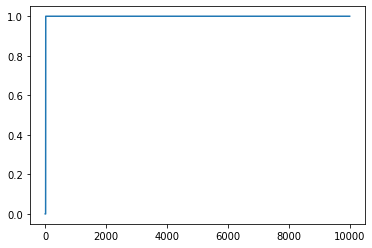

In [26]:
plt.plot(cma_history)

In [51]:
cma_res = cma_result[0]

In [52]:
z.update_nn(cma_res)
z.eval_fn()

0.0

----  

In [ ]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

# STILL RUNNING, BUT IS NOT UPDATING THE GUI. 
## Please don't touch.

ga_history, result = test_solver(ga, _x)

plt.plot(ga_history)

result[0]

z.update_nn(result[0])

z.eval_fn()

oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

oes_history, result = test_solver(oes, _x)

plt.plot(oes_history)

oes_res = result[0]

In [ ]:
s = _x.fitness(fn=show_state) if _x.env.pics else _x.fitness()
_x.vis=None
print(s)

In [ ]:
np.save('winning_with_monster.npy', _x.images)

In [ ]:
# 1600 * 1000 * 100 # frames seen

In [ ]:
torch.save(_x.nn, "./dzelda_base_agent_150.pt")

In [ ]:
_x.env.env.close()

In [ ]:
t = []
objs = []
answers = []

for i in range(1, 4):
    t.append(NNagent(GridGame(game='dzelda', 
                      play_length=1000, 
                      path='./levels',
                      lvl_name=f'{i}.txt',
                      mechanics=['1', '2', '3', '+', 'g', 'w'], # monsters, key, door, wall
                      images=False,
                             )
                    )
            )
    
    if i == 1:
        t[-1].nn = torch.load("./dzelda_base_agent_150.pt")
    else:
        t[-1].nn = torch.load(f"./dzelda_{i-1}_agent_{150*(i)}.pt") #load previous best weights
    
    objs.append(PyTorchObjective(t[-1]))
    
    
    start = time.time()
    ans = differential_evolution(objs[-1].fun, bounds, 
                                 strategy='rand1bin',
                                 popsize=99, 
                                 maxiter=150,
                                 polish=False, 
                                 x0=objs[-1].x0)
    end = time.time() - start
    
    answers.append(ans)
    state_dict = objs[-1].unpack_parameters(ans.x)
    objs[-1].f.load_state_dict(state_dict)
    
    torch.save(t[-1].nn, f"./dzelda_{i}_agent_{150*(i+1)}.pt")
    
for pair in t:
    pair.env.env.close()

```

First: Train an agent on an extremely simple level to give the agent a behavior starting point. 
    - In POET that was a flat terrain. In my case, it's a level that looks like this: 
    -   wwwwwwwwwwwww    
        w...........w    A --> agent
        w...........w    + --> key
        w.+....A....w    g --> goal
        w...........w
        w...........w    Task: Take the key to the goal
        w...........w
        w.g.........w
        wwwwwwwwwwwww
        
Second: Initialize agent-environment population with the first learned behavior
    
While True:
    
    Evaluate each agent in it's paired environment
    
    Mutate environments (every m loops). 
    
        Mutation of an environment causes the agent neural network to be copied into the new environment
        This increases the population.
        
        - An example mutation could be
            - adding/removing in an enemy (three types)
            - adding/moving a goal
            - adding/removing a key
            - moving an agent
            - An example new level could look like this: 
                - wwwwwwwwwwwww    
                  w....+..1...w    A --> agent
                  w...g.......w    + --> key
                  w...........w    g --> goal
                  w...........w
                  w...w.......w    Task: Take the key to the goal
                  w.......A...w
                  w.g.........w
                  wwwwwwwwwwwww

    (slowly) Run one step of optimization for each agent within it's paired environment.
    
    Transfer agents between environments (every k loops)
        Intuition: Agent alpha might have learned behavior in it's paired environment that is actually behavior that is very good in environment beta. 
        
        - test every agent in every environment. 
        - transfer into environment i, the agent j, who performed the best.
    
    Return to top of the loop.
    
```

# Note. 

Moving the key from top right corner to mid left created a slightly simpler env.

----  

we were not able to learn the good policy if we kept the wieght range as [-2, 2]. 

Next I am retrying the same starting point but with range [-5, 5]. --> solved extremely simple env with this range and simpler env. 



----  
Then moving the key up one spot meant that the agent needs more training. So far it has failed to take the key and get to the goal after an additional 20 generations of training (but does get the key). I am giving it another 20 generations. 

After the agent learns the new environment (key moved up one spot), I am going to take those weights and put them back into the first env (key moved back down one spot).

----  
Note: There are times that the optimization straight up fails after only a generation or two. I think this is coming from the fact that the problem is very sparely rewarded.   

----

Edited dzelda.txt: 
    - picking up key +1
    - killing monster +1
    - taking key to door +2


1)  
```
wwwwwwwwwwwww
w...........w
w...........w
w.+....A....w
w...........w
w...........w
w...........w
w.g.........w
wwwwwwwwwwwww
```
2)   
```
wwwwwwwwwwwww
w...........w
w...........w
w.+.........w
w......A....w
w...........w
w...........w
w.g.........w
wwwwwwwwwwwww
```

3)  
```
wwwwwwwwwwwww
w...........w
w...........w
w.+.........w
w......A....w
w...........w
w..1........w
w.g.........w
wwwwwwwwwwwww
```

4)  
```
wwwwwwwwwwwww
w...........w
w...........w
w.+.w.......w
w...w..A....w
w...........w
w..1........w
w.g.........w
wwwwwwwwwwwww
```

Model:
```  
   Net(
      (conv1): Conv2d(13, 8, kernel_size=(3, 3), stride=(1, 1))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv2): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
      (fc1): Linear(in_features=96, out_features=48, bias=True)
      (fc2): Linear(in_features=48, out_features=24, bias=True)
      (fc3): Linear(in_features=24, out_features=6, bias=True)
   )

```

# Differetial Evolution:

## $\theta :=$ model_weights  
## Pick $\theta_a, \theta_b, \theta_c$   
## $Proposal_\theta = \theta_a + \alpha * (\theta_b - \theta_c))$

## Pros:
Computationally efficient  
Self-adaptation and crossover due to $\theta_b - \theta_c$

## Problems:  

$\theta$ is a ~10000 dimensional vector. 

Curse of Dimensionality!   
    - As the dimension go up, vectors become equidistant  

Good weight configurations are sparse.

Rewards are sparse.
    
    

Interesting observation. Whenever the agent completes the goal, it seems to do so with the minimal path. That's suprising to me because we're giving the agent 1000 time-steps and the fitness function is not taking account (yet) of the number of steps that the agent has used as a weighting on the score it achieves. 